# Hypothesis

## "Do unreleased IPO Tickers have a real impact on the market?"
* I believe that a confusion in IPO information causes investors to buy similar spelling or sounding tickers, even though the desired ticker is unreleased to the public.
* For example, phonetically, PACS and PAXS are the exact same. I want to see if an unreleased PACS can effect an already traded PAXS.

## Process:
#### I have gathered a list of IPO Tickers that launched in the last 6 months. I have also pulled a list of tickers that have similar spelling, phonetically alike, or can easily be fat-fingered.

#### This project started during a one on one at work. About a month ago, news of our S1 filing went public. The president of the company was  getting the impression that many investors and other industry leaders thought that PACS was public. In my thinking, I wanted to see if there was a correlation in those similar sounding/spelling stocks. Because simply, people make mistakes.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import openpyxl
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## List of Independent Variable Tickers and IPO dates

### Show Dependent/Independent table

In [2]:
# Read in Excel file
ipo_list = pd.read_excel(fr'IPO_tickers.xlsx', sheet_name="correspond",index_col=False)
ipo_list
# Date Ranges will be used later
date_range = ipo_list
date_range['Difference_dates'] = date_range['IPO_date'] - date_range['Pre_date']
date_range_max = date_range['Difference_dates'].max().days
date_range_min = date_range['Difference_dates'].min().days

## Set time ranges based on the dates in the dataframe
* We want within a year before the oldest IPO and up to the most current IPO
* Use max/min on dates to get the ranges

In [3]:
ipo_list['IPO_date'] = pd.to_datetime(ipo_list['IPO_date'])

# Extract unique tickers from the IPO list
tickers = ipo_list['Dependent'].unique()
tickers = tickers.tolist()

# Determine the start and end dates for fetching the data
start_date = ipo_list['IPO_date'].min() - timedelta(weeks=52)
end_date = ipo_list['IPO_date'].max()

## Download the necessary tickers and compute continuous returns
* I found in this situation, volume and continuous returns are interchangable and produce identical results

In [4]:
stock_data = yf.download(tickers, start=start_date, end=end_date)
stock_data.reset_index(inplace = True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'].dt.date).copy()
stock_data.set_index('Date',inplace = True)

# stock_data = stock_data['Volume']
stock_data = stock_data['Adj Close']
stock_data.resample('D').last()

return_data = np.log(stock_data/ stock_data.shift(1))
return_data = return_data.dropna()

[*********************100%%**********************]  17 of 17 completed


In [5]:
return_data.head()

AAPL      BARK      BOWL     BRK-A     BRK-B       LOB  \
Date                                                                     
2022-09-16 -0.011021 -0.083819  0.072563 -0.006171 -0.006854 -0.014189   
2022-09-19  0.024774 -0.033336  0.034398  0.016276  0.014953 -0.000858   
2022-09-20  0.015544 -0.011364  0.003591 -0.003495 -0.006546 -0.003438   
2022-09-21 -0.020476  0.016998 -0.049220 -0.028847 -0.023328  0.016793   
2022-09-22 -0.006396  0.022223  0.001505 -0.006283 -0.008271 -0.031831   

                 PAC      PACK       PAG      PAGS      PAXS       PPL  \
Date                                                                     
2022-09-16  0.003061 -0.086831 -0.014798 -0.046429 -0.018536  0.001384   
2022-09-19  0.011944 -0.015234  0.021742  0.027725 -0.012143  0.014759   
2022-09-20 -0.003437 -0.096627 -0.032213 -0.023717 -0.001834 -0.015451   
2022-09-21 -0.014009 -0.031904  0.001737  0.001332 -0.001225 -0.016397   
2022-09-22 -0.029770 -0.027815 -0.001930 -0.066049 -0.009233 -0.001760   

                  PX        RM      ROAM      ROMO       TEL  
Date                                                          
2022-09-16 -0.003494 -0.017892 -0.005182 -0.000402 -0.012550  
2022-09-19 -0.010554  0.034535  0.001542  0.000563  0.005120  
2022-09-20 -0.025068 -0.010645 -0.005666 -0.004994 -0.014123  
2022-09-21  0.019749 -0.018104 -0.010071 -0.001212 -0.011827  
2022-09-22 -0.049190 -0.046917 -0.003502 -0.005268 -0.031094

# Build graphs

## Match Dependent tickers to IPO_date of the Independent tickers and build portfolio on those 'activity' date ranges
* Gather date 1 year prior to IPO and 3 days after

In [6]:
from datetime import timedelta

matched_tickers = [ticker.strip() for ticker in return_data.columns]

ipo_list_matched = ipo_list[ipo_list['Dependent'].isin(matched_tickers)]

ticker_data_dict = {}

# Iterate through each ticker
for ticker in matched_tickers:
    ipo_date = ipo_list_matched.loc[ipo_list_matched['Dependent'] == ticker, 'IPO_date'].iloc[0]
    # Set the actual release date
    release_date = ipo_date
    # Account for visualizations 3 days after release
    ipo_date = ipo_date + timedelta(days=3)
    # Calculate the start date (two weeks before IPO_date)
    start_date = ipo_date - timedelta(weeks=52)
    
    # Select data for the current ticker within the specified time range
    ticker_data = return_data[[ticker]].loc[start_date:ipo_date]
     
    # Add ticker data to the dictionary
    ticker_data_dict[ticker] = ticker_data
    
# Concatenate all data
consolidated_df = pd.concat(ticker_data_dict.values(), axis=1)
specified_returns = consolidated_df
specified_returns.fillna(0, inplace = True)
specified_returns


AAPL  BARK  BOWL  BRK-A  BRK-B  LOB       PAC      PACK       PAG  \
Date                                                                            
2022-09-19   0.0   0.0   0.0    0.0    0.0  0.0  0.000000  0.000000  0.000000   
2022-09-20   0.0   0.0   0.0    0.0    0.0  0.0  0.000000  0.000000  0.000000   
2022-09-21   0.0   0.0   0.0    0.0    0.0  0.0  0.000000  0.000000  0.000000   
2022-09-22   0.0   0.0   0.0    0.0    0.0  0.0  0.000000  0.000000  0.000000   
2022-09-23   0.0   0.0   0.0    0.0    0.0  0.0  0.000000  0.000000  0.000000   
...          ...   ...   ...    ...    ...  ...       ...       ...       ...   
2024-04-04   0.0   0.0   0.0    0.0    0.0  0.0  0.020304 -0.037931 -0.019686   
2024-04-05   0.0   0.0   0.0    0.0    0.0  0.0  0.015370 -0.009062  0.006279   
2024-04-08   0.0   0.0   0.0    0.0    0.0  0.0  0.009040  0.010349 -0.003069   
2024-04-09   0.0   0.0   0.0    0.0    0.0  0.0 -0.038220  0.012788  0.009892   
2024-04-10   0.0   0.0   0.0    0.0    0.0  0.0 -0.015098 -0.060228 -0.028108   

                PAGS      PAXS  PPL        PX        RM  ROAM  ROMO  TEL  
Date                                                                      
2022-09-19  0.000000  0.000000  0.0  0.000000  0.034535   0.0   0.0  0.0  
2022-09-20  0.000000  0.000000  0.0  0.000000 -0.010645   0.0   0.0  0.0  
2022-09-21  0.000000  0.000000  0.0  0.000000 -0.018104   0.0   0.0  0.0  
2022-09-22  0.000000  0.000000  0.0  0.000000 -0.046917   0.0   0.0  0.0  
2022-09-23  0.000000  0.000000  0.0  0.000000 -0.017622   0.0   0.0  0.0  
...              ...       ...  ...       ...       ...   ...   ...  ...  
2024-04-04 -0.004405  0.004385  0.0  0.004773  0.000000   0.0   0.0  0.0  
2024-04-05 -0.008869  0.009950  0.0  0.000000  0.000000   0.0   0.0  0.0  
2024-04-08  0.008133  0.002472  0.0 -0.004773  0.000000   0.0   0.0  0.0  
2024-04-09 -0.003689 -0.011173  0.0 -0.009615  0.000000   0.0   0.0  0.0  
2024-04-10 -0.045359 -0.012746  0.0 -0.067441  0.000000   0.0   0.0  0.0  

[392 rows x 17 columns]

## Using a heatmap, identify any correlation between the dependent and independent stocks. My thinking is that there is not enough data yet to support correlation for these 2024 IPO's.
* The berkshire ones make sense
* There seems to be a promising relation between ROAM and ROMO but ROMO is an ETF...

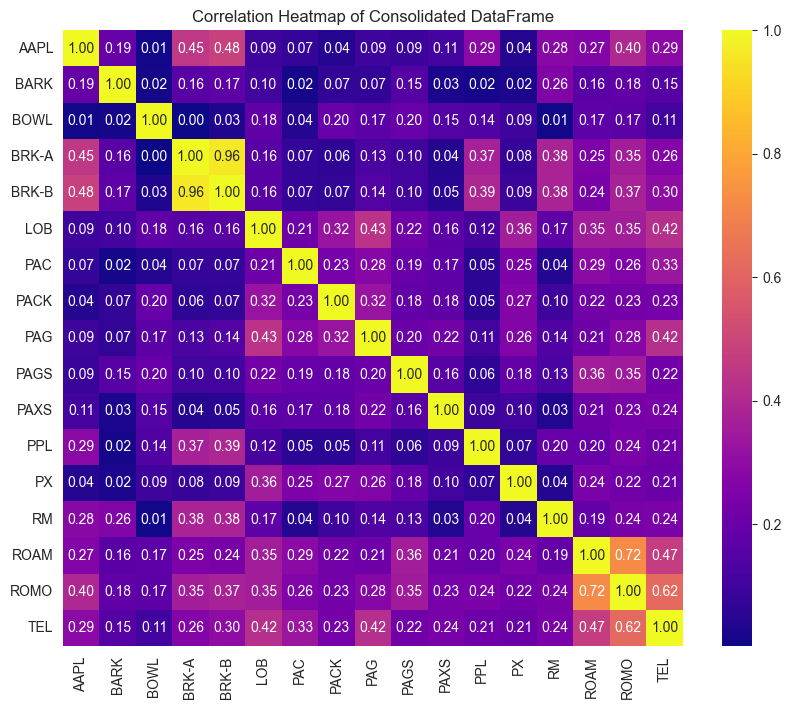

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(specified_returns.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap of Consolidated DataFrame')
plt.show()


## Plot continuous returns for dependent variable, along with the F1/S1 news and IPO date for the independent variable
* Using ranges specific to each ticker

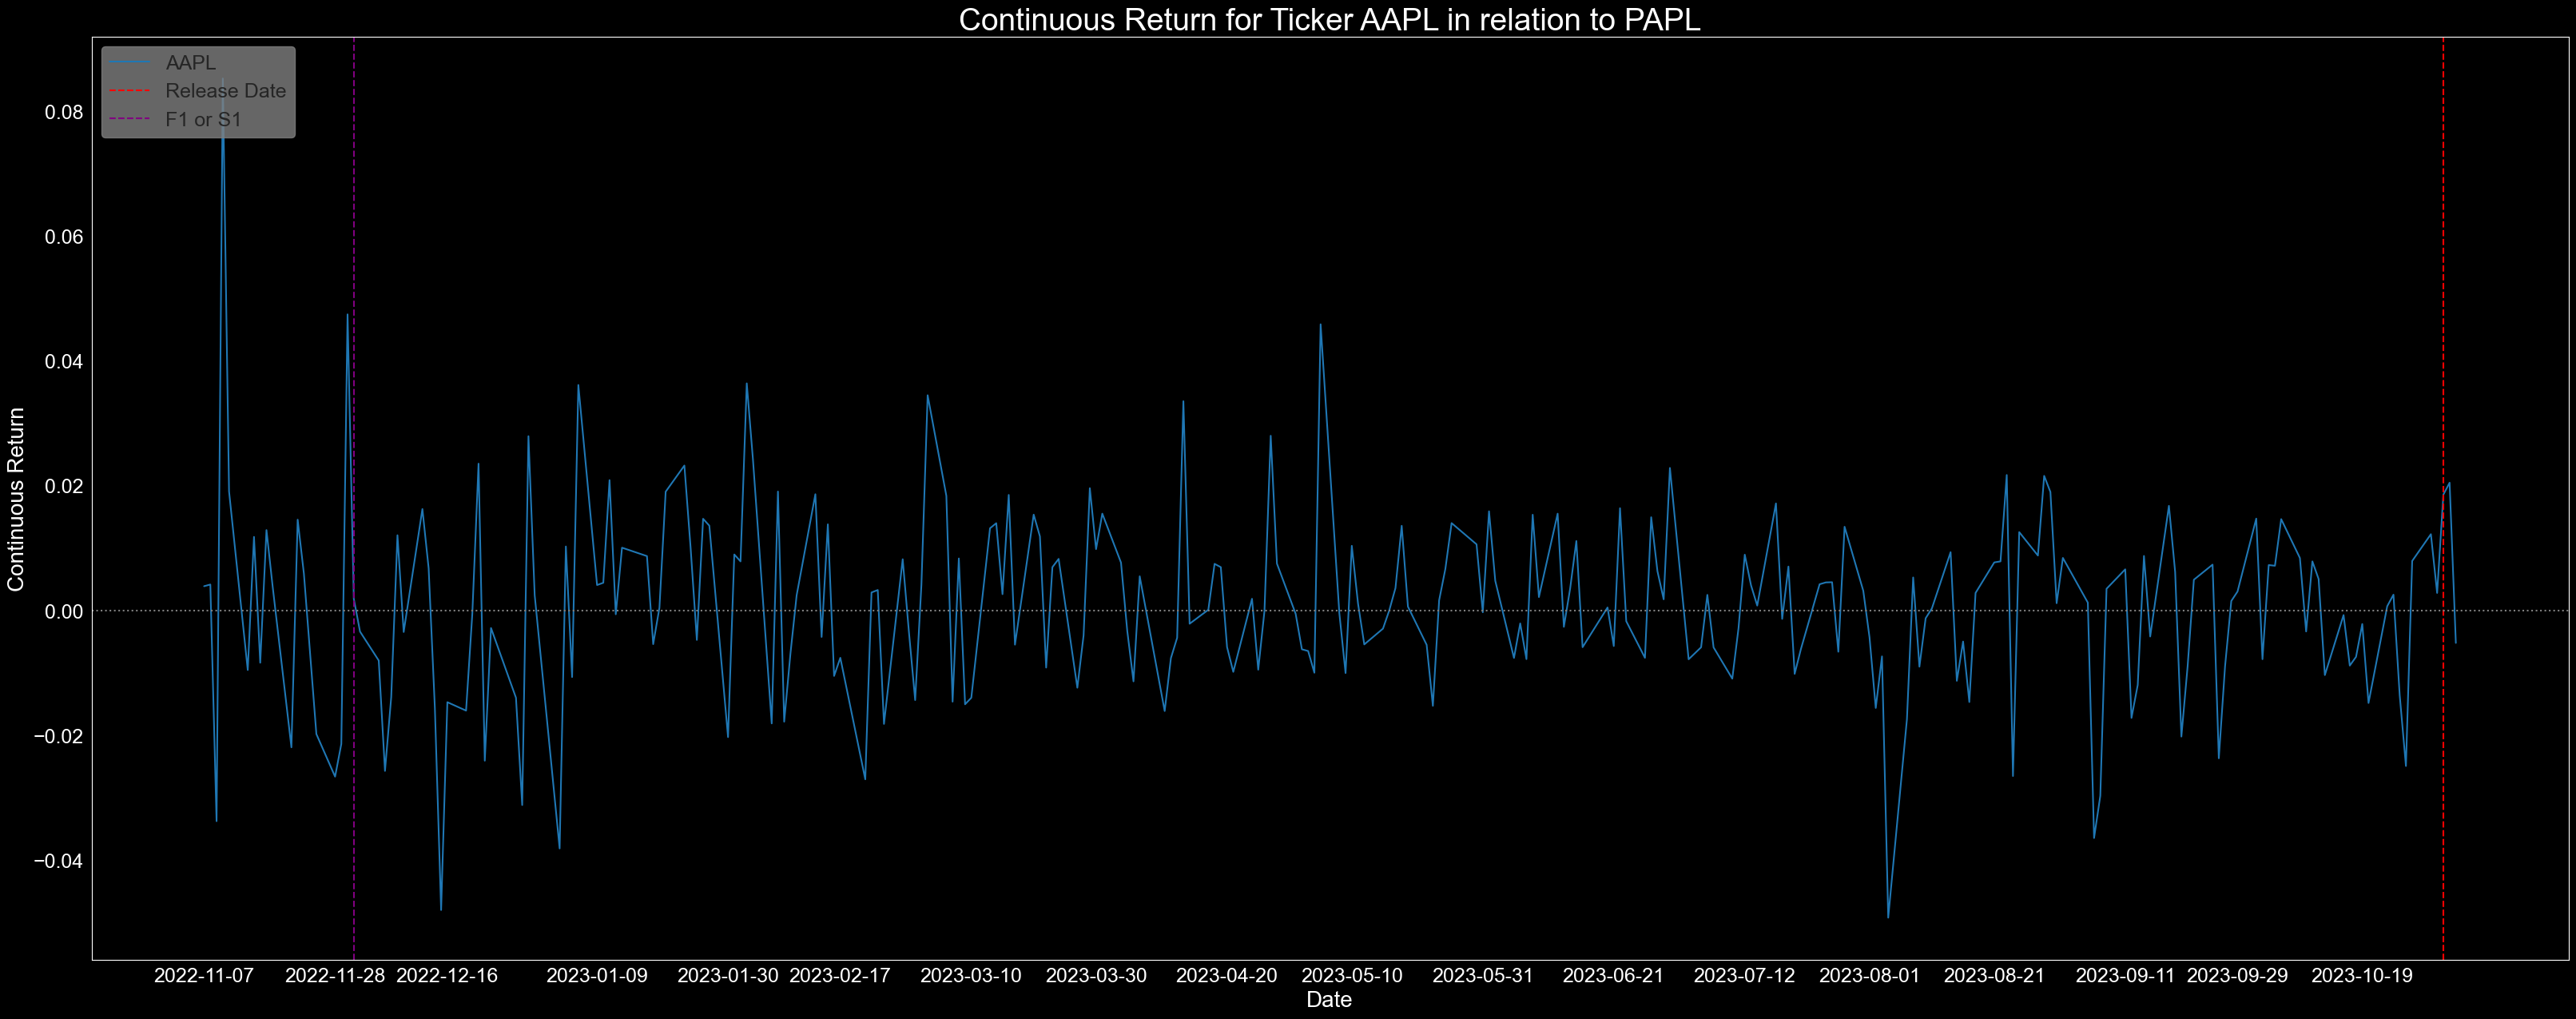

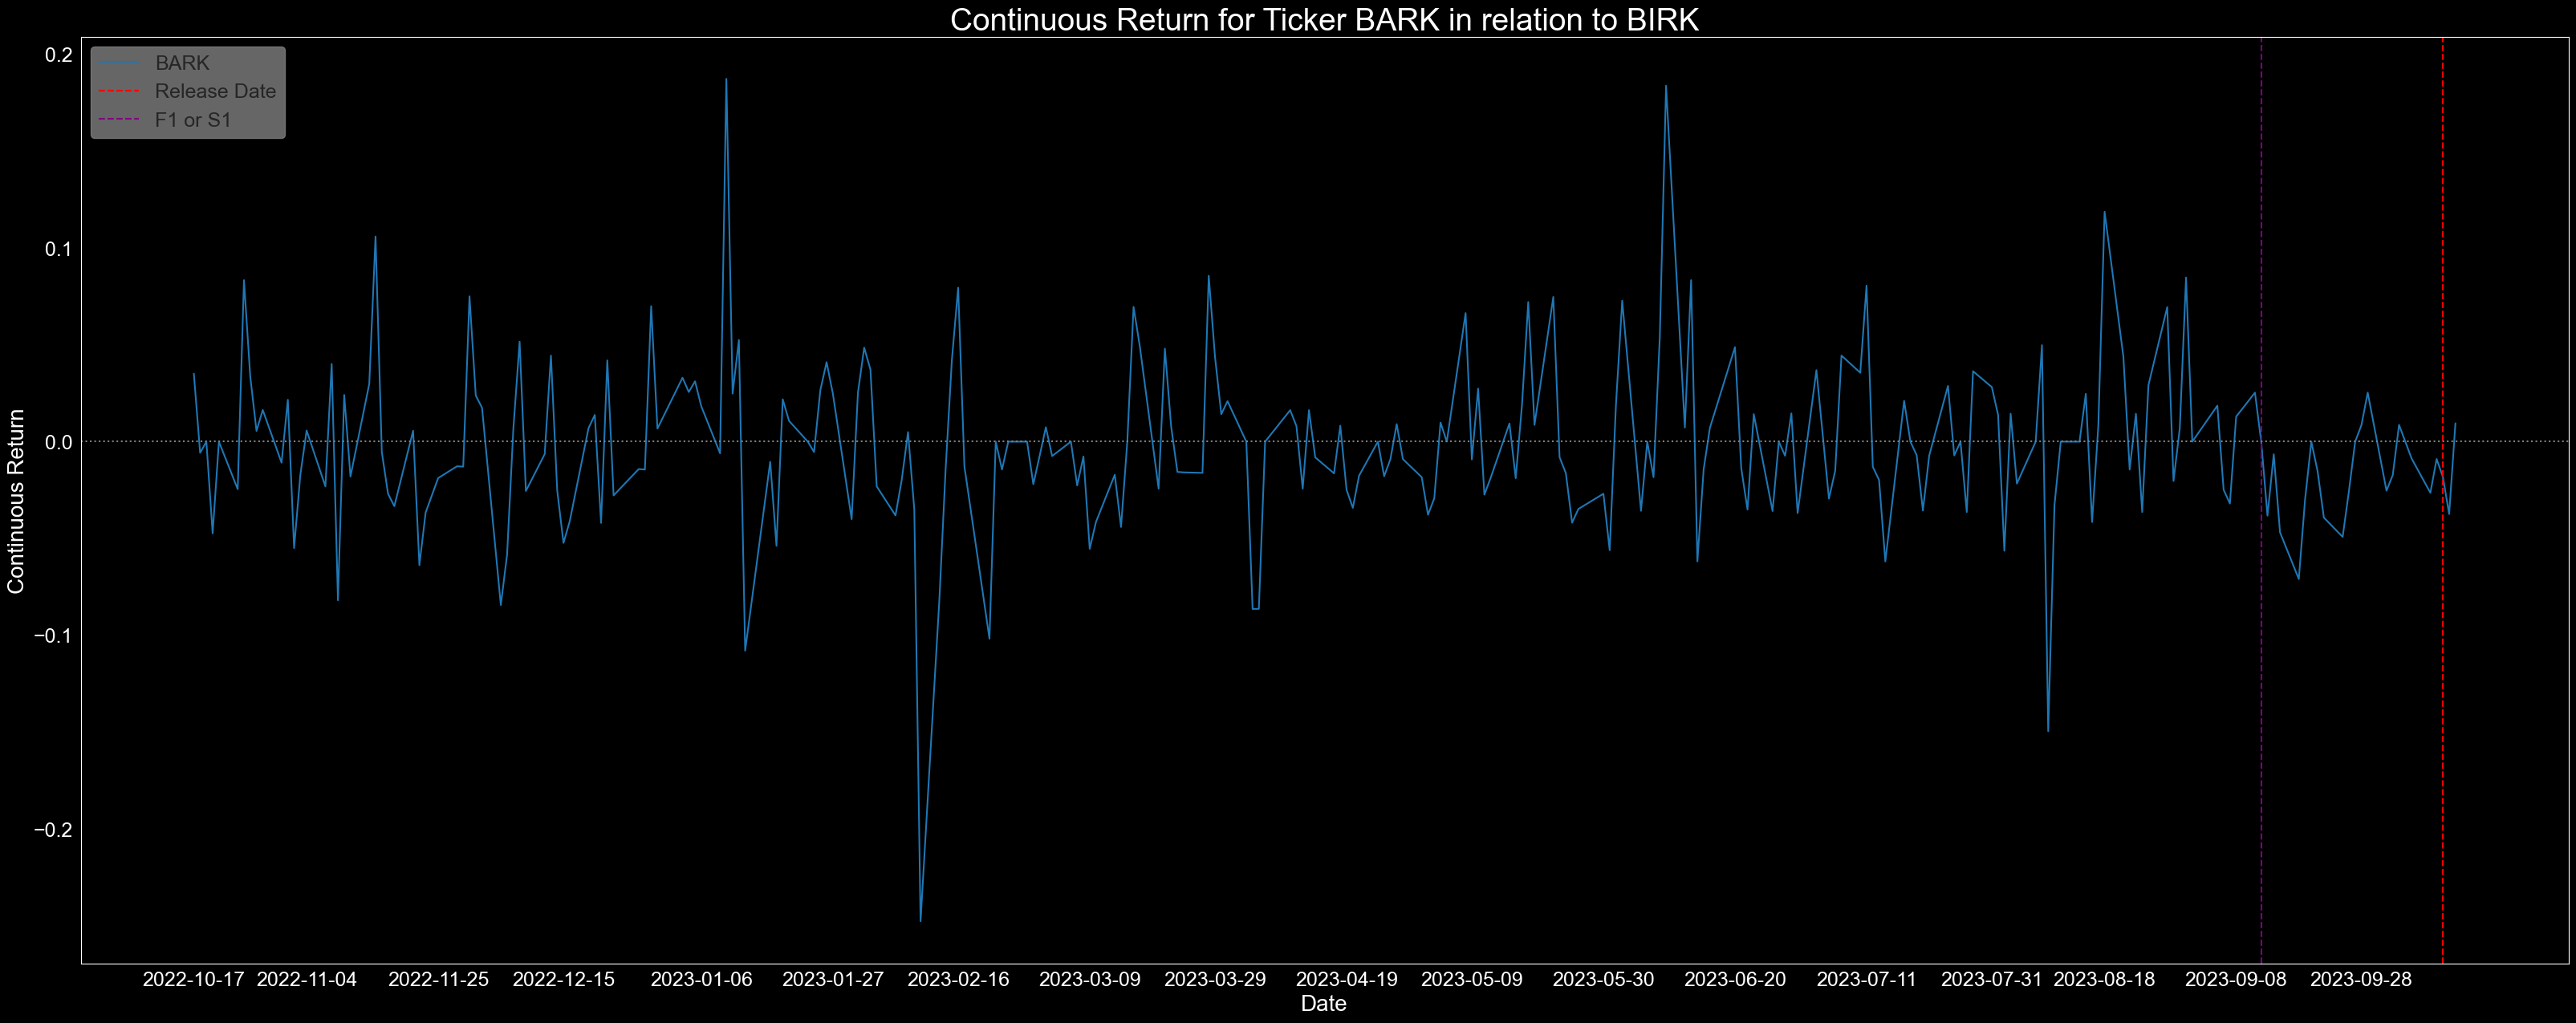

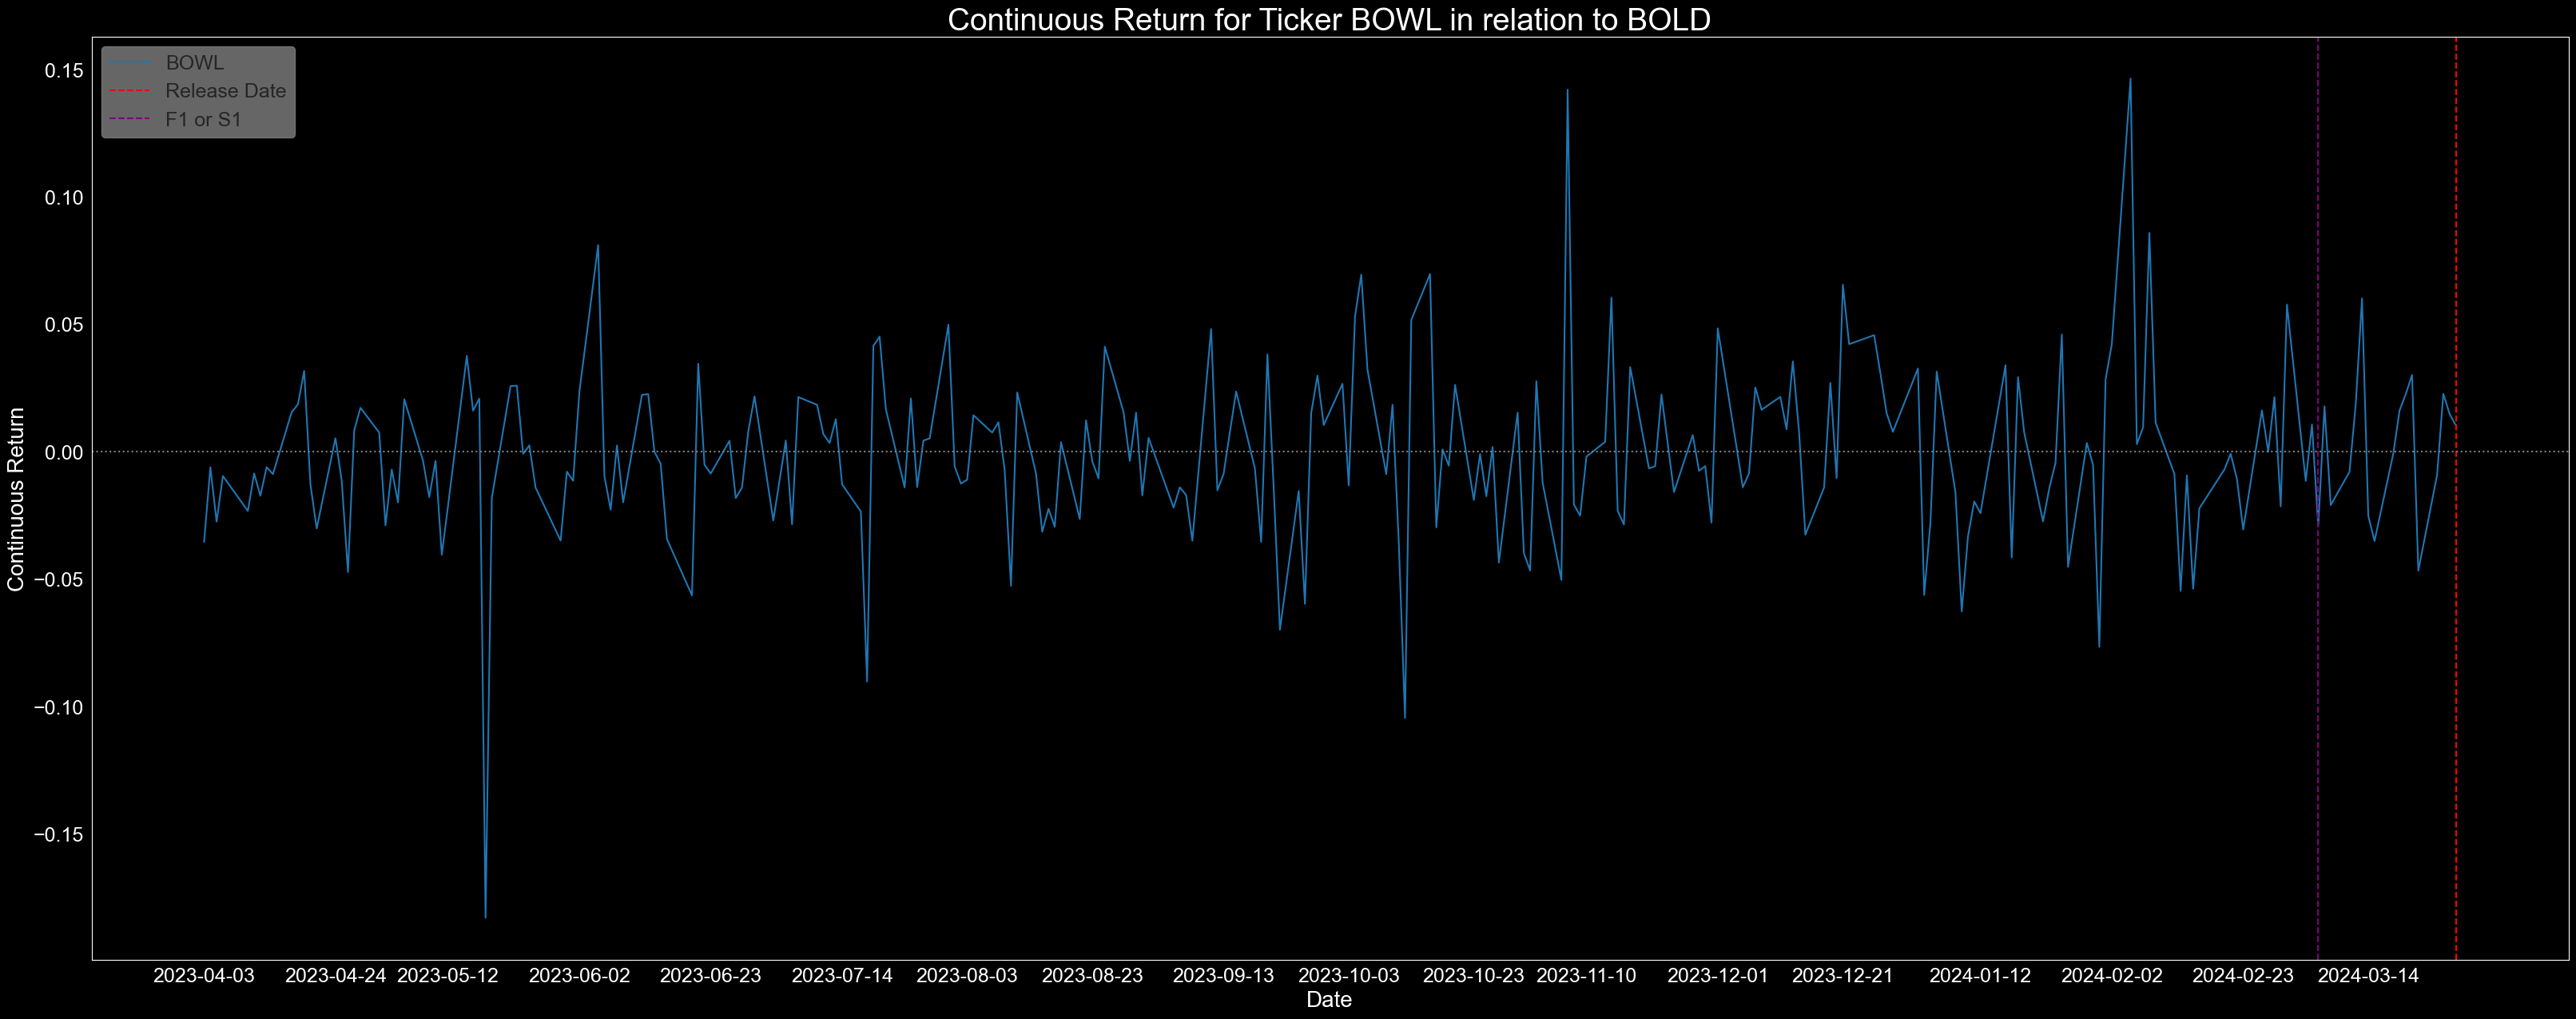

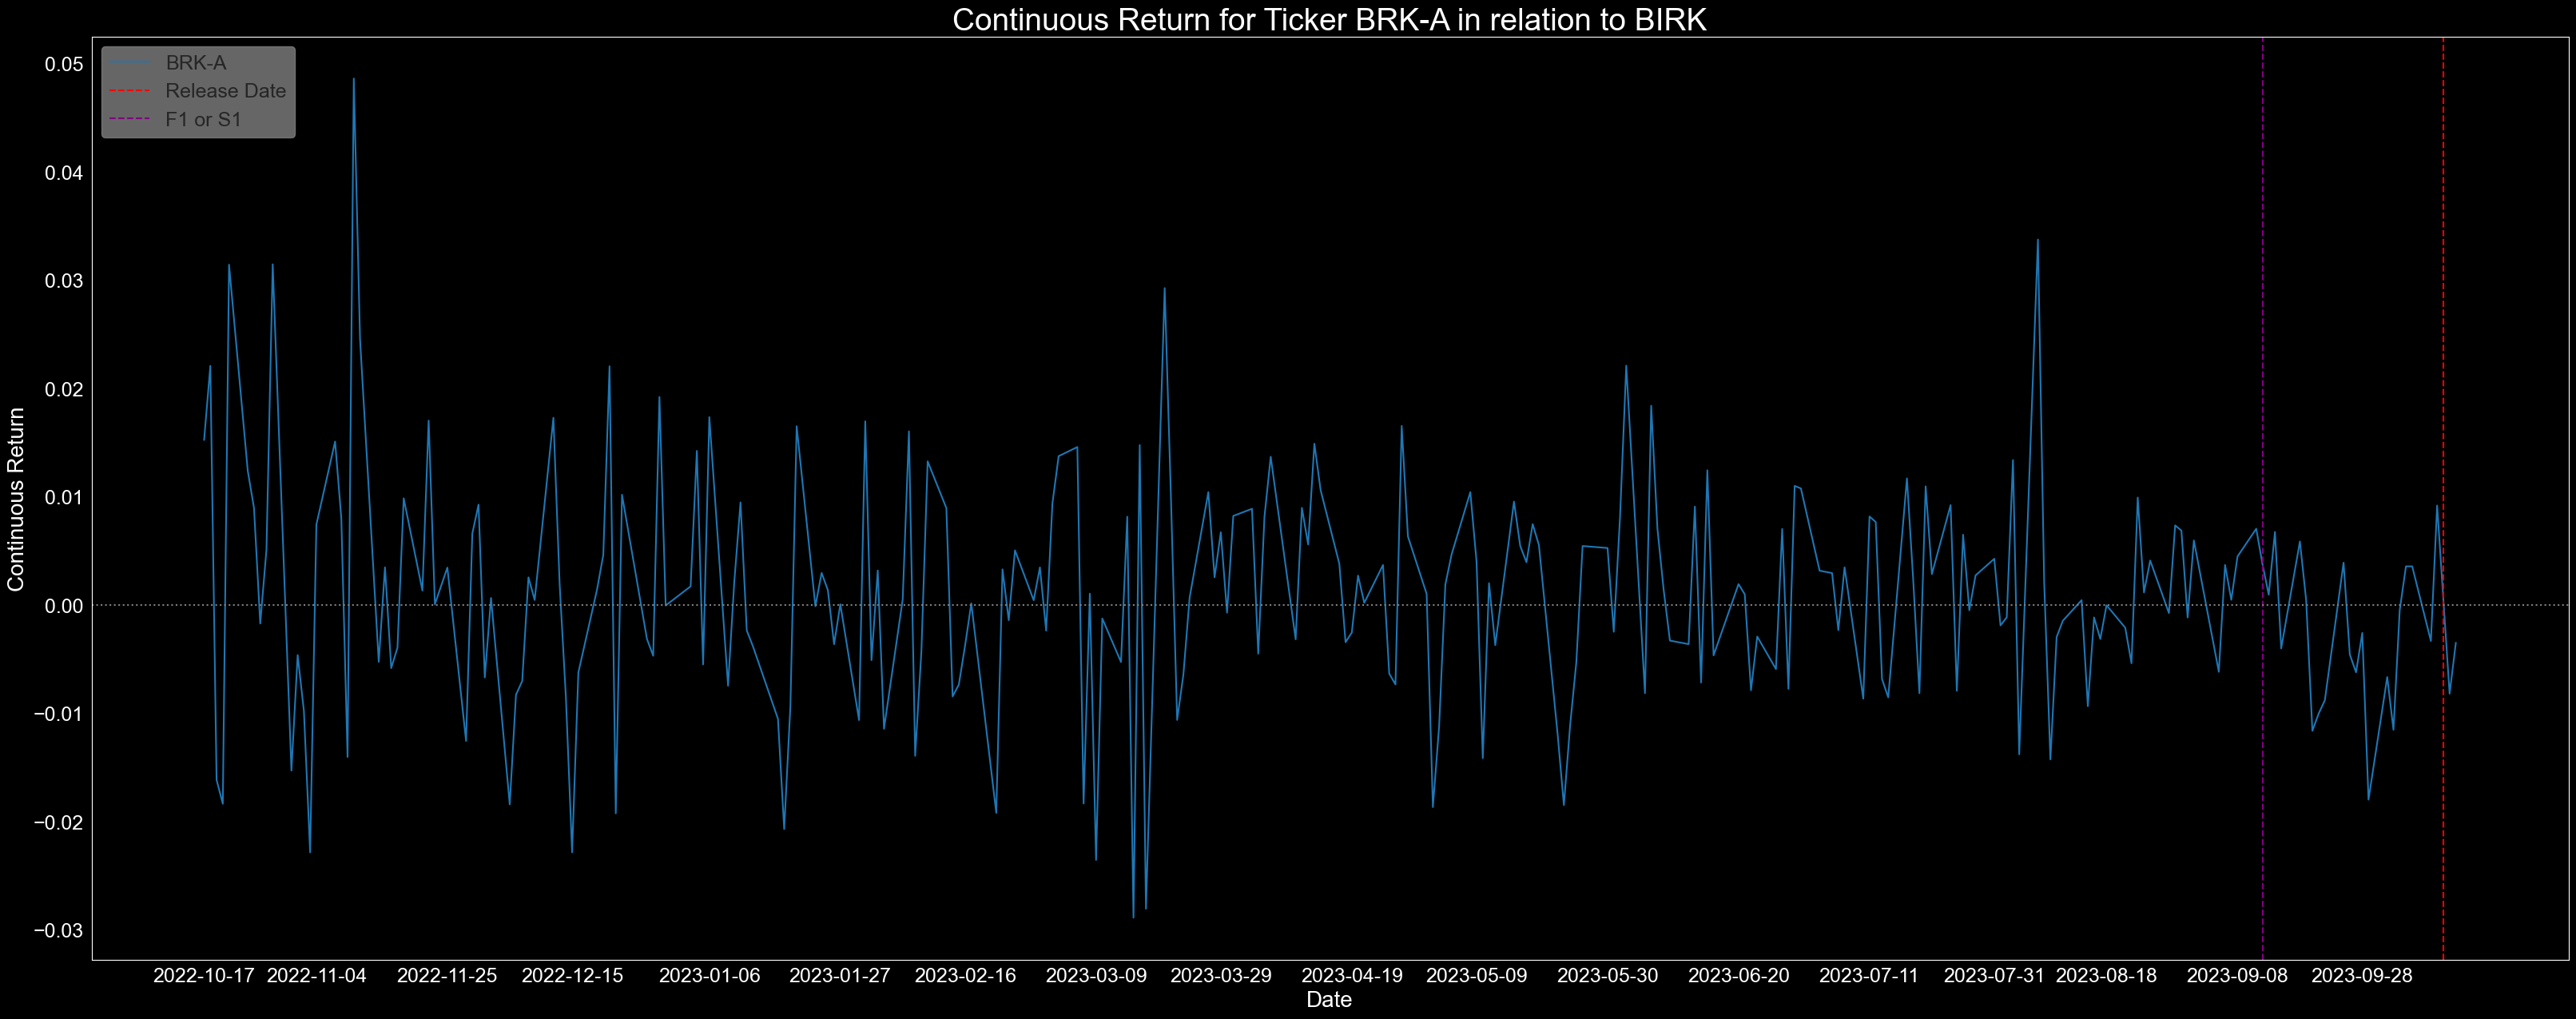

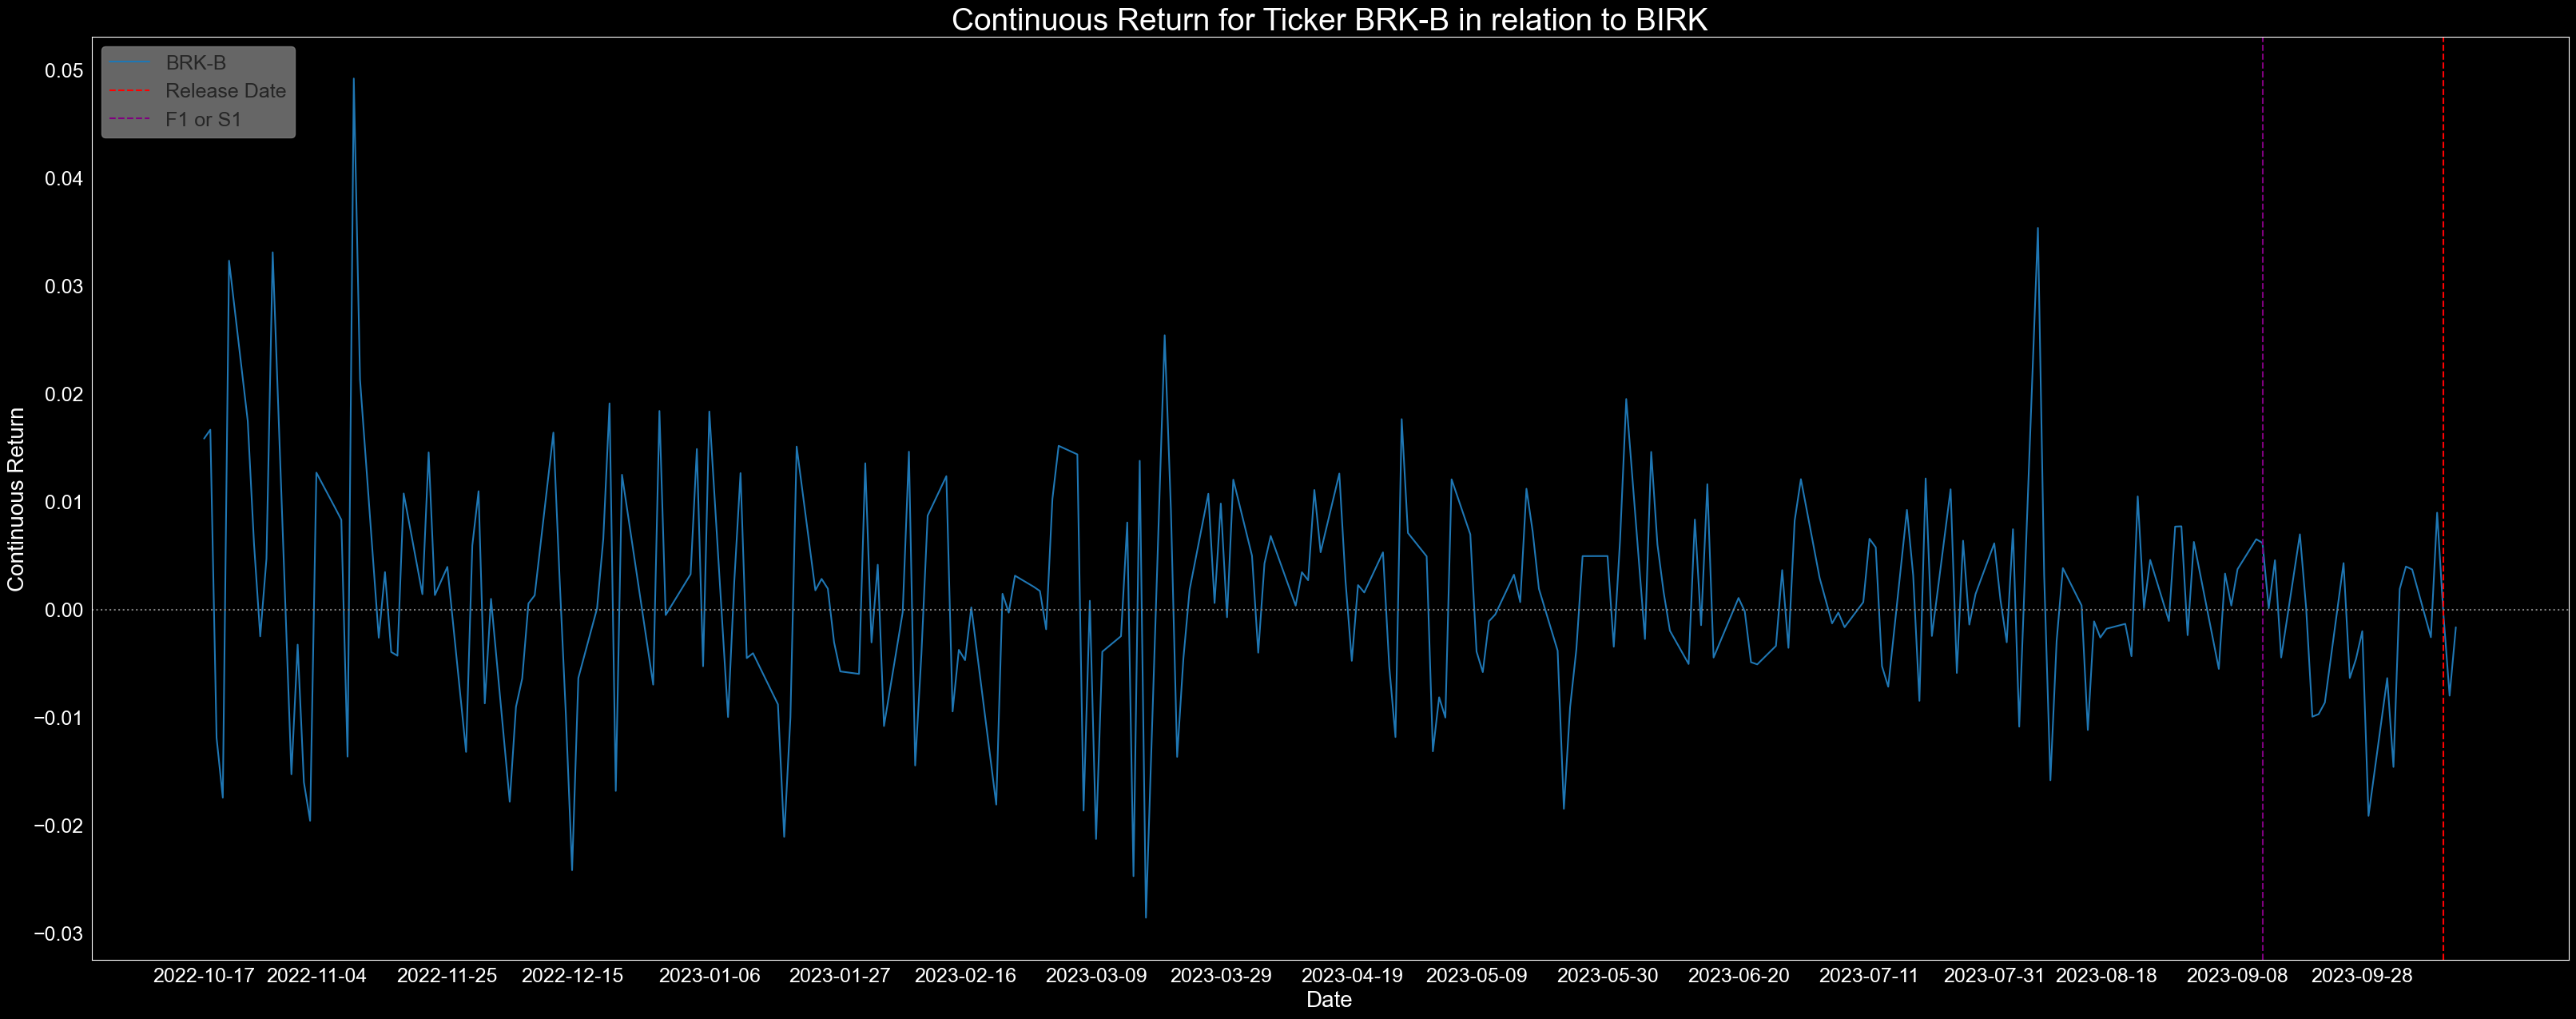

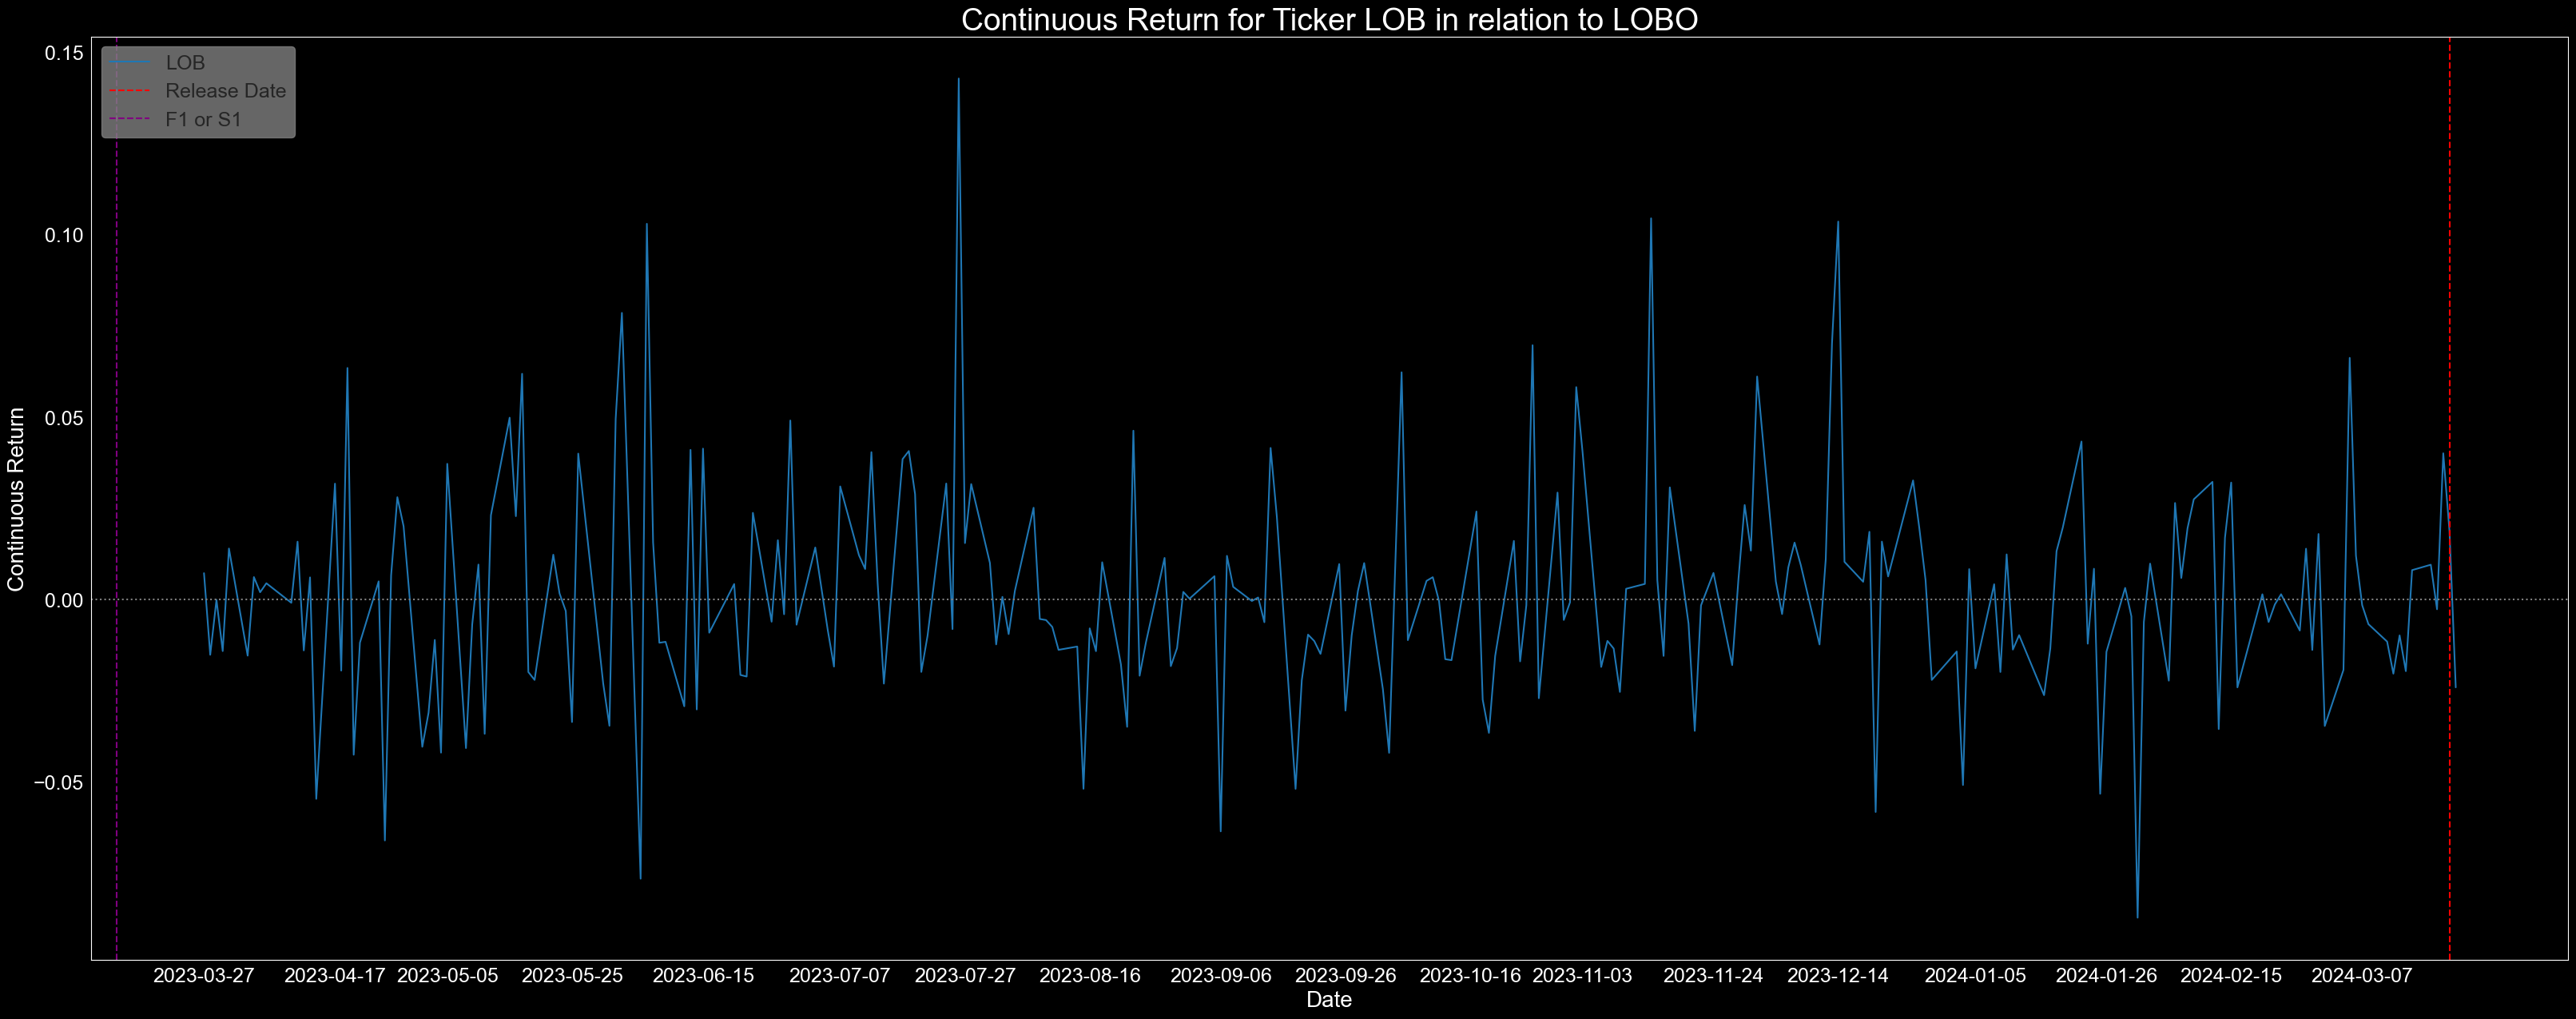

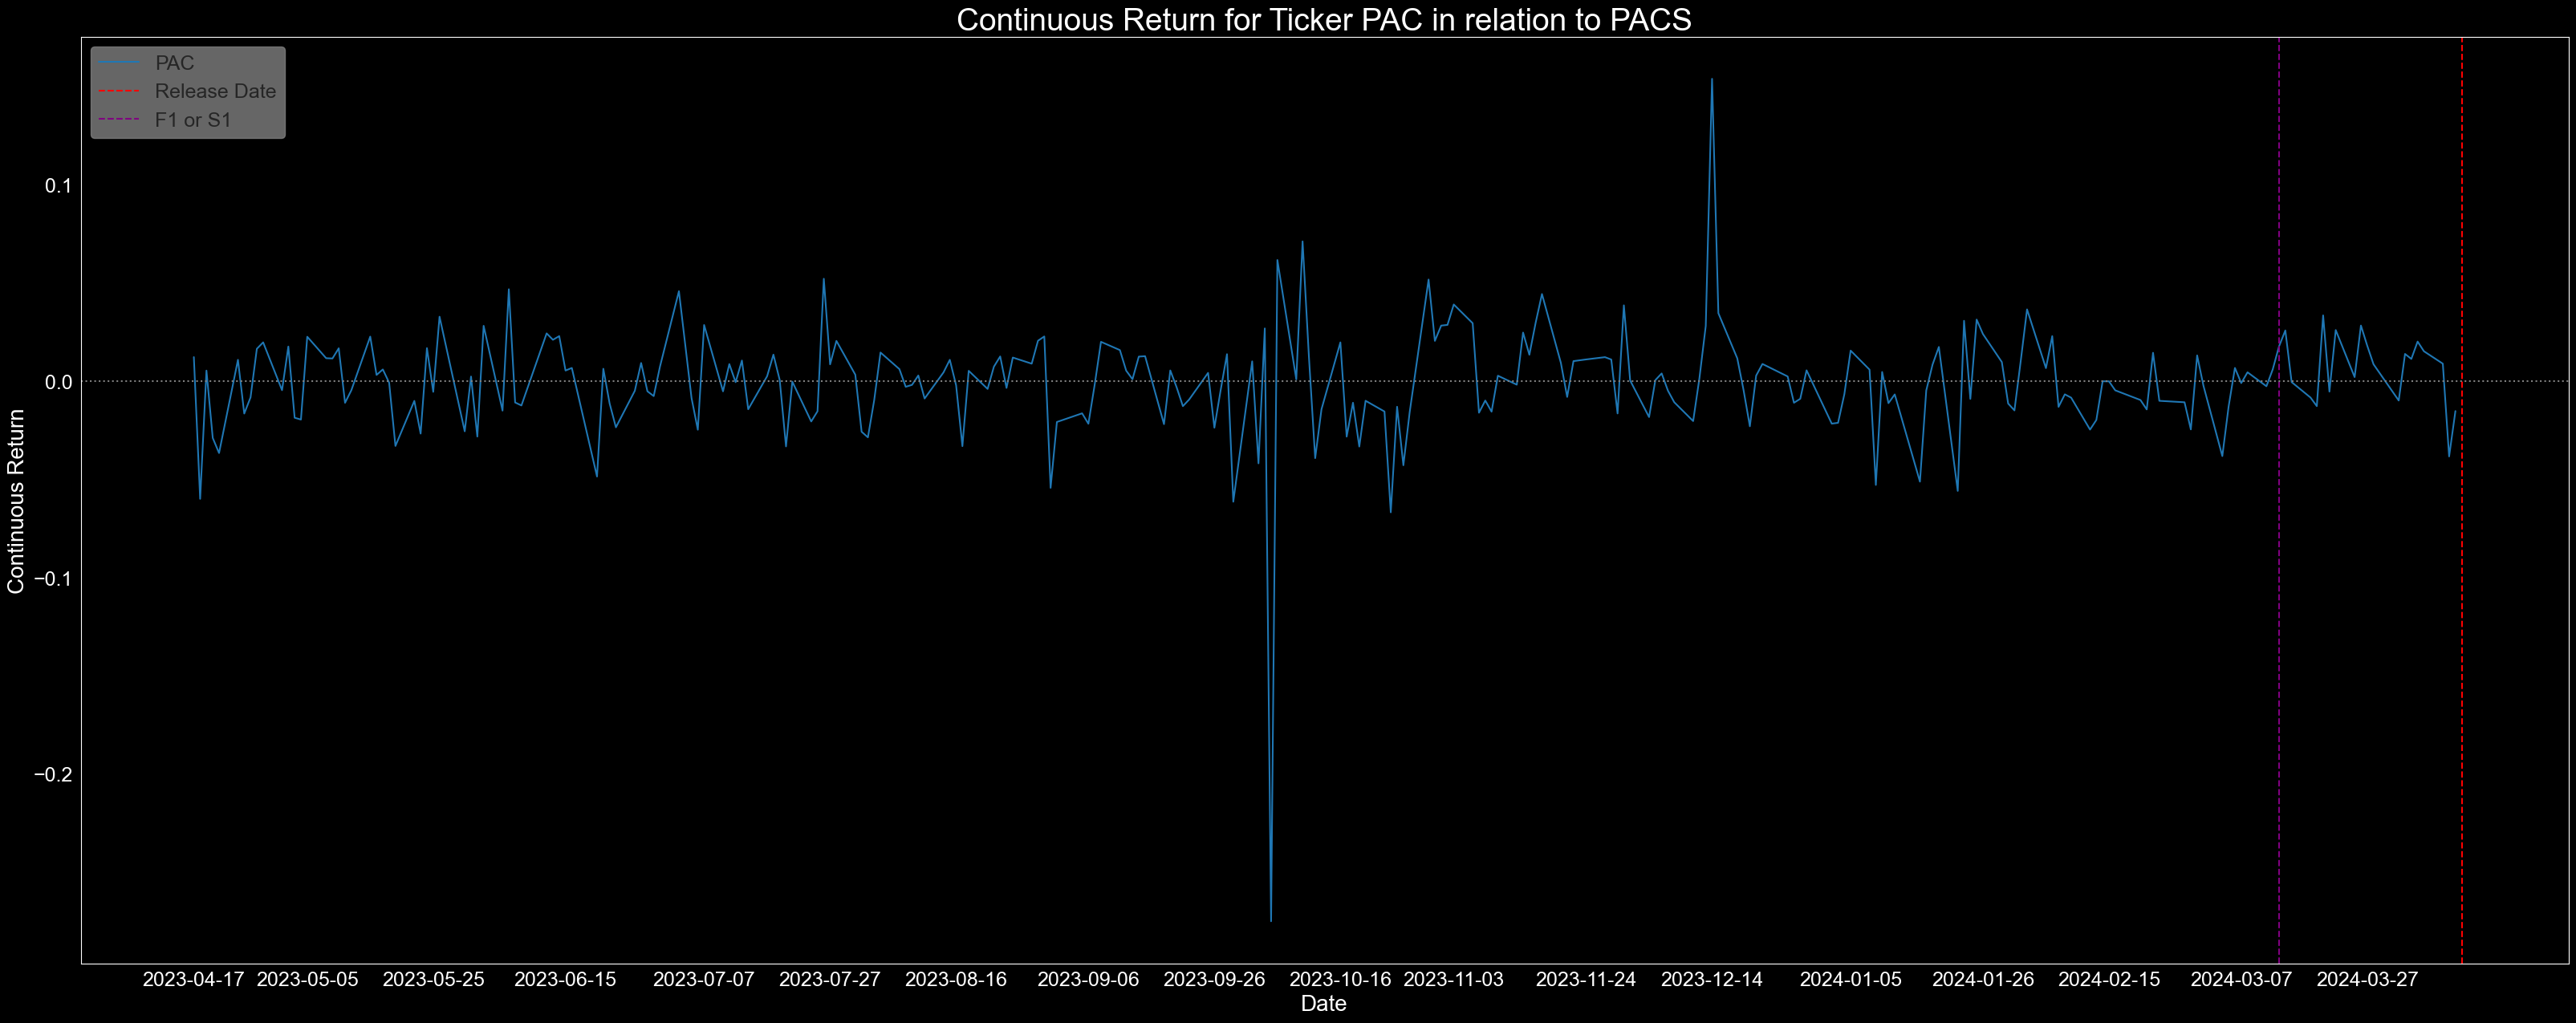

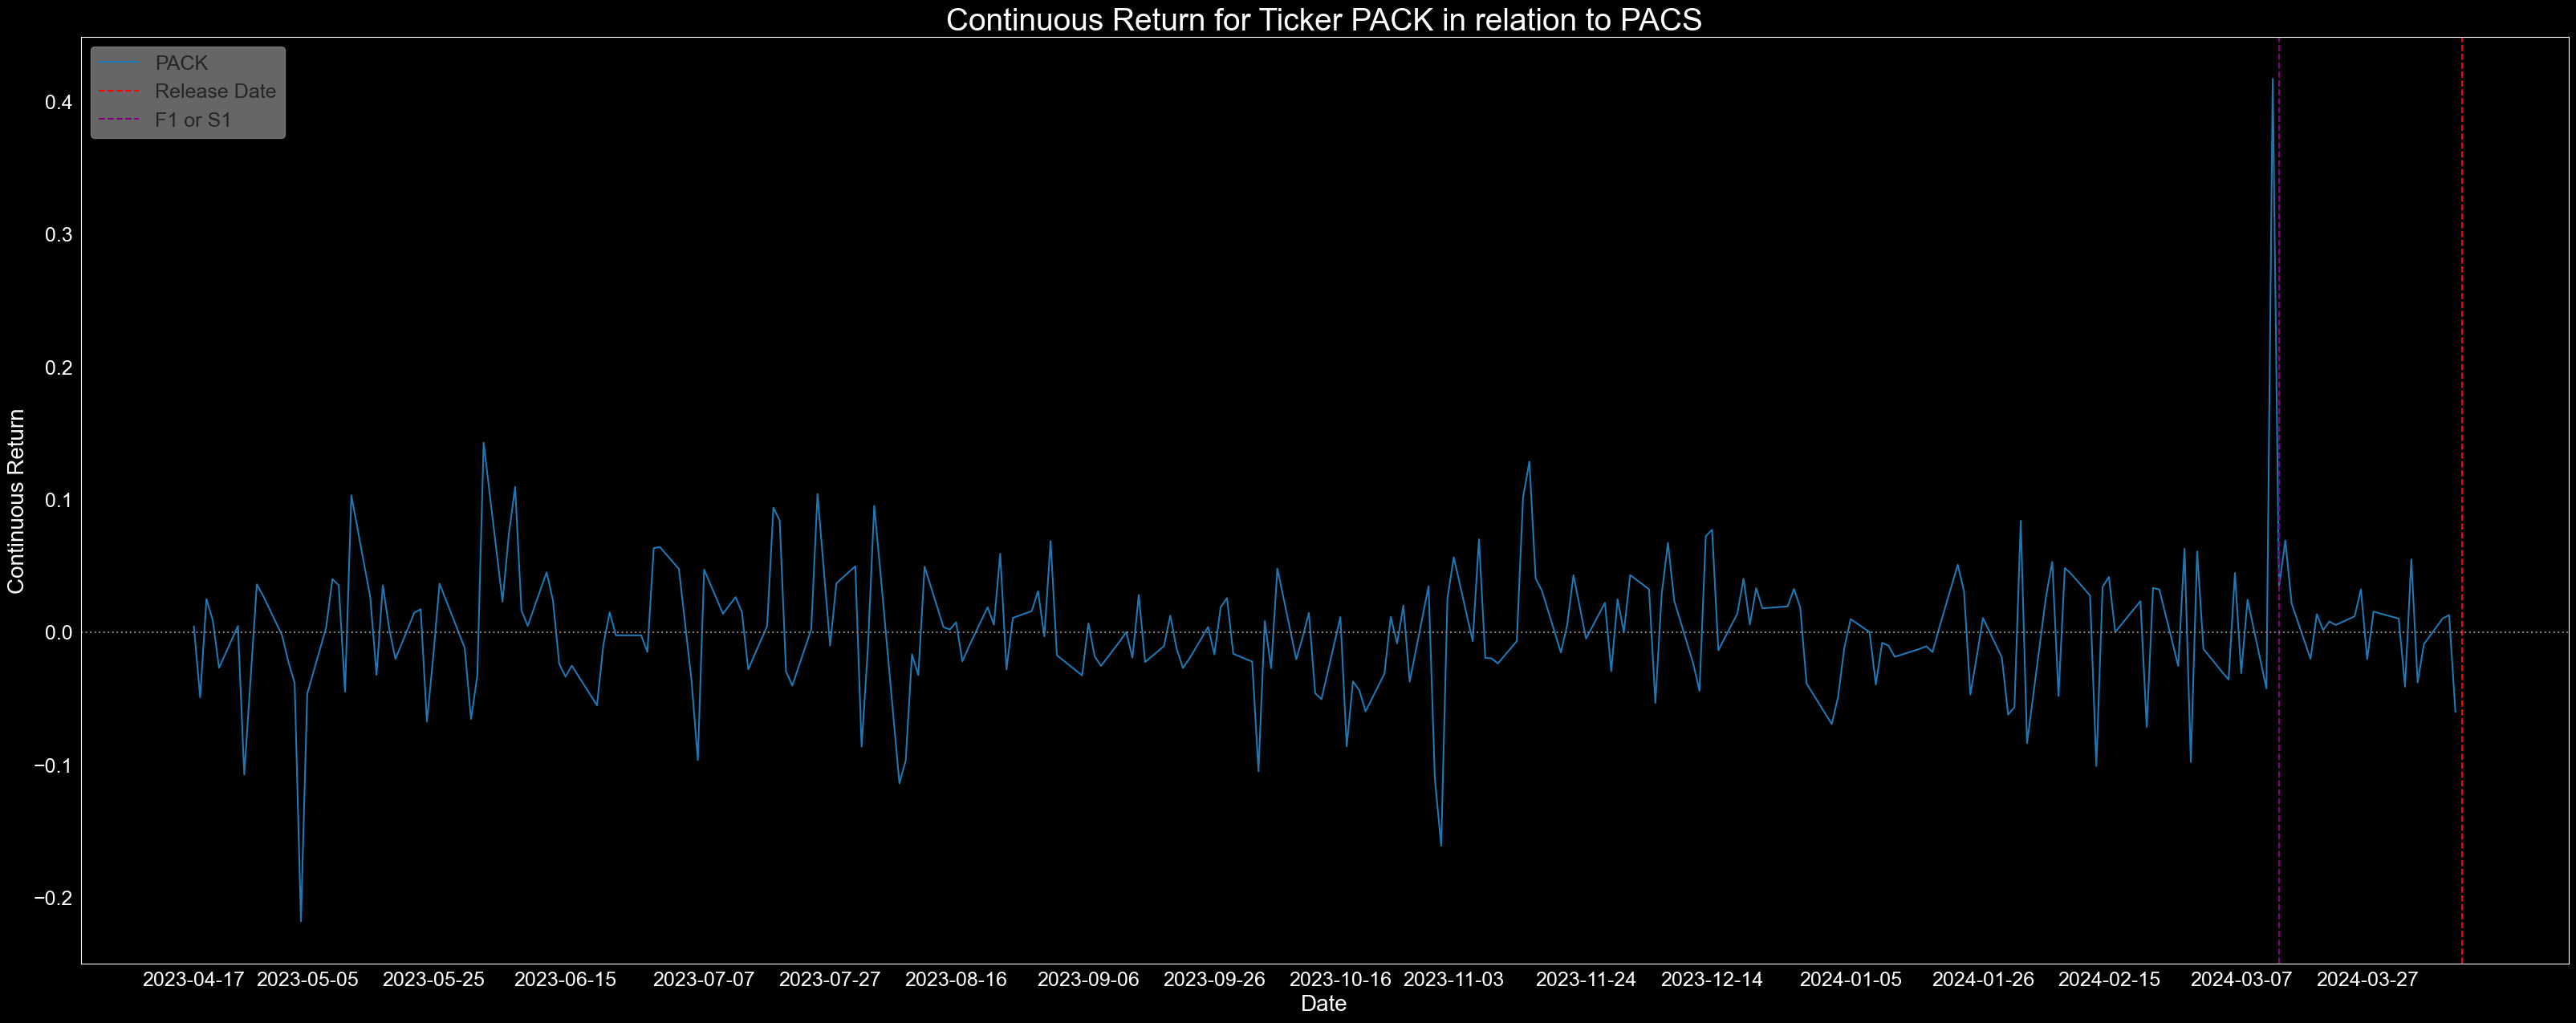

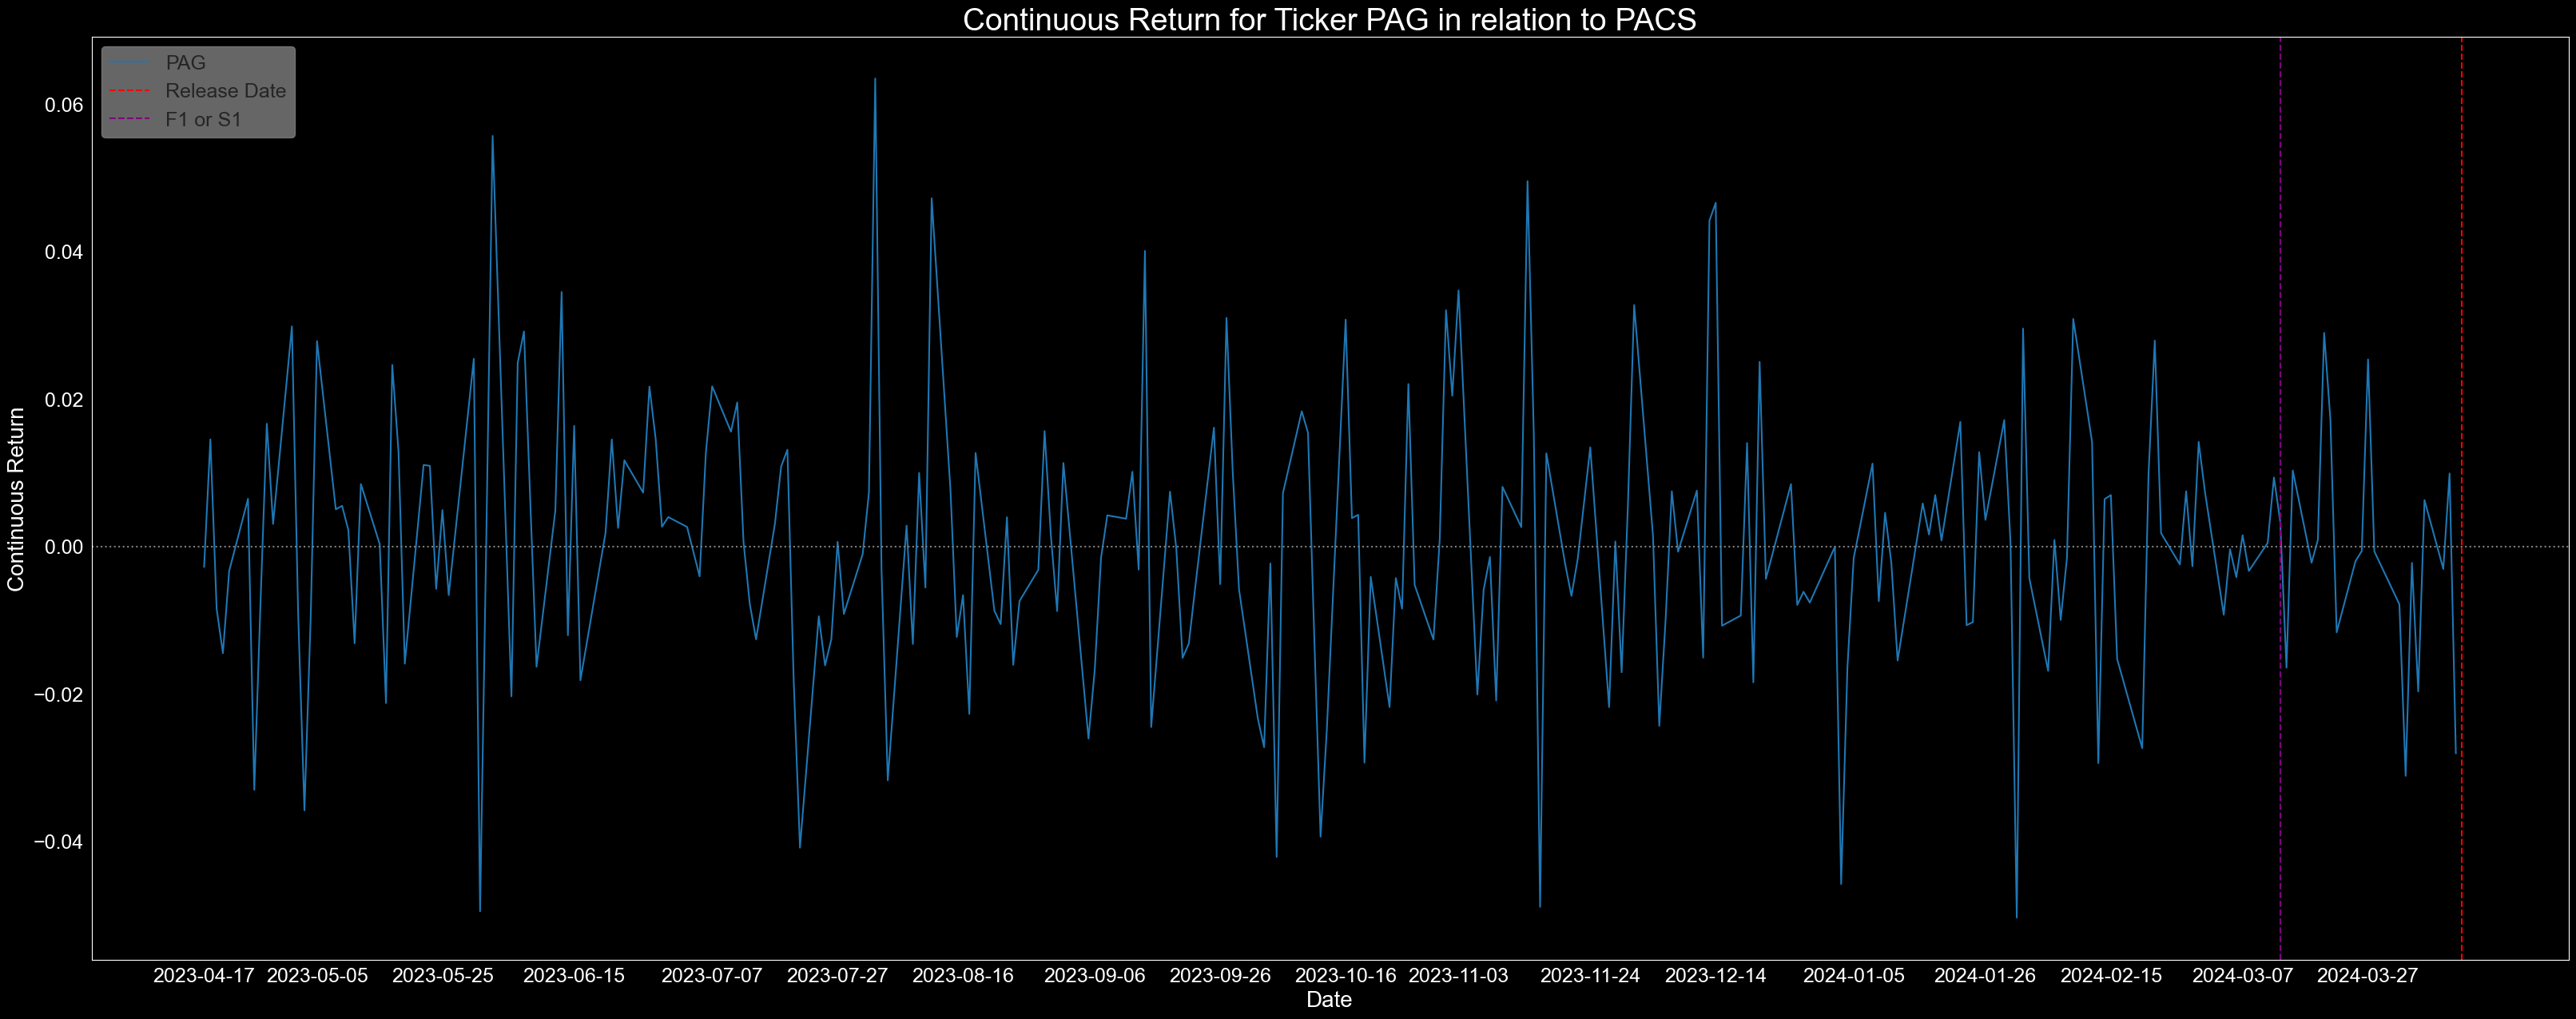

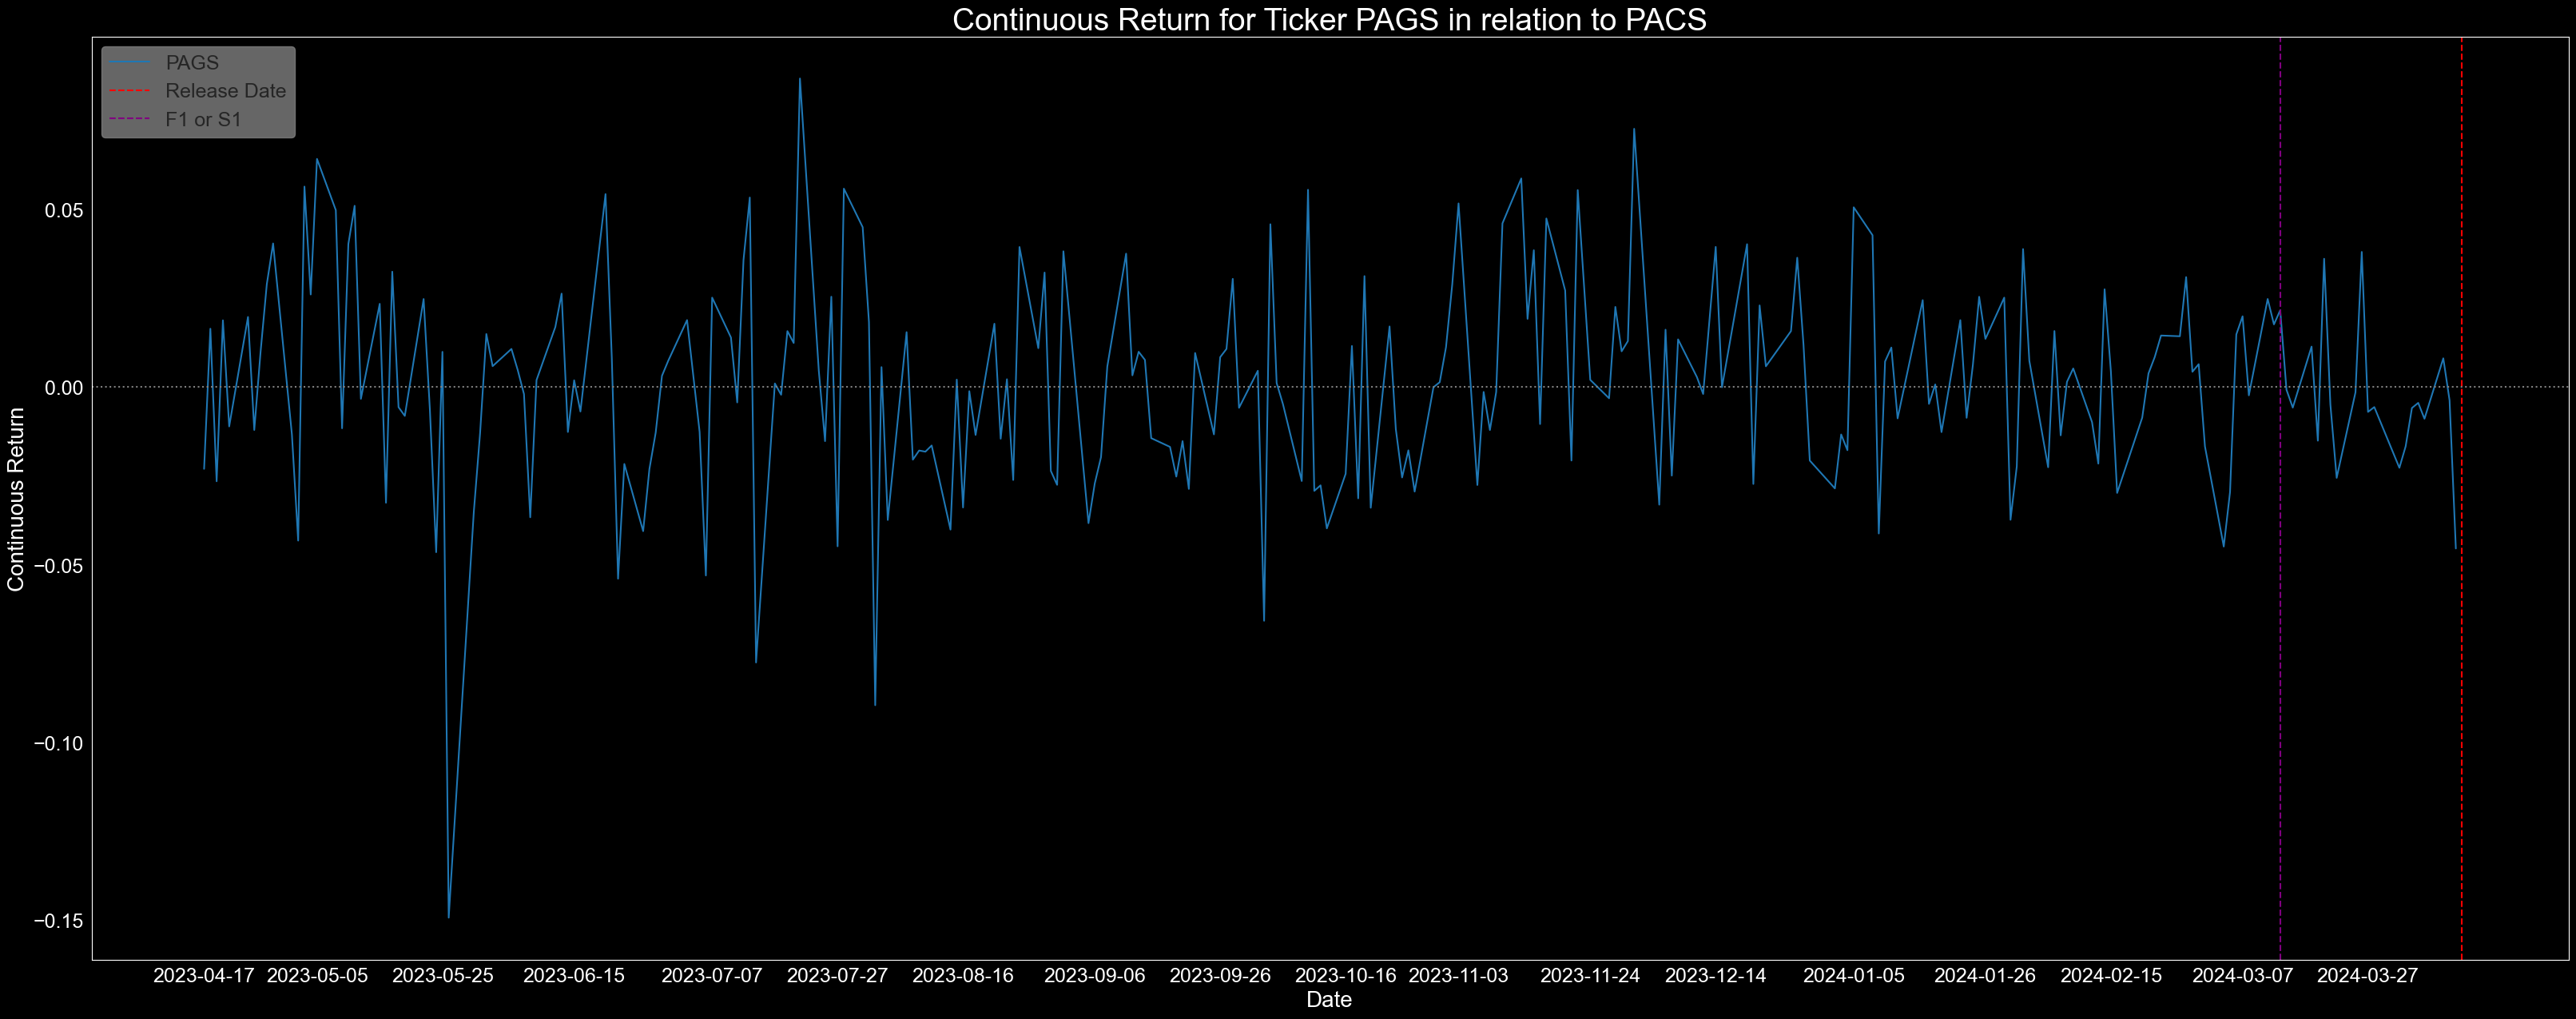

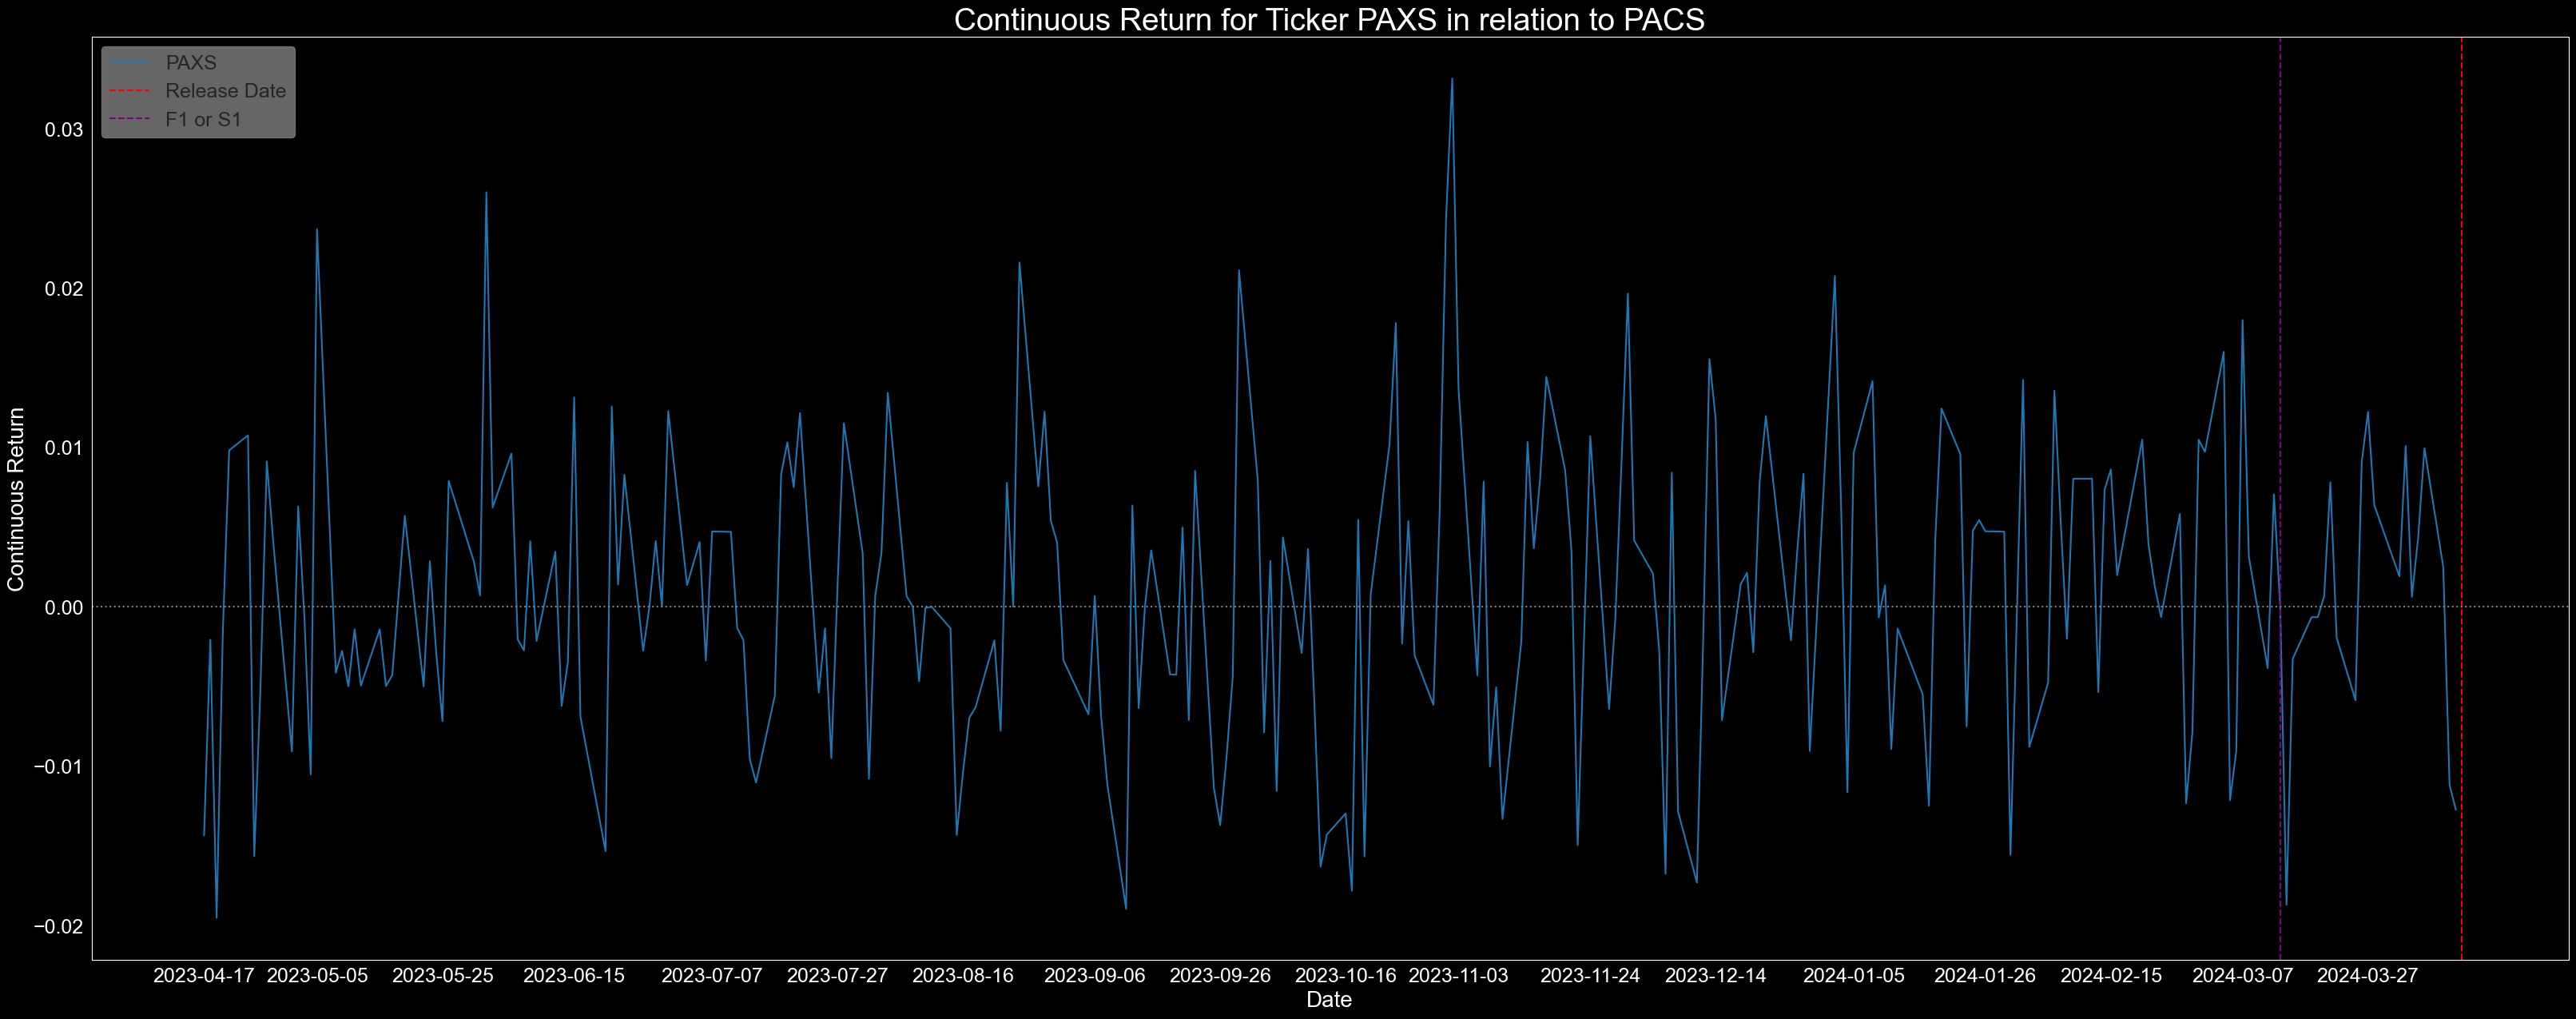

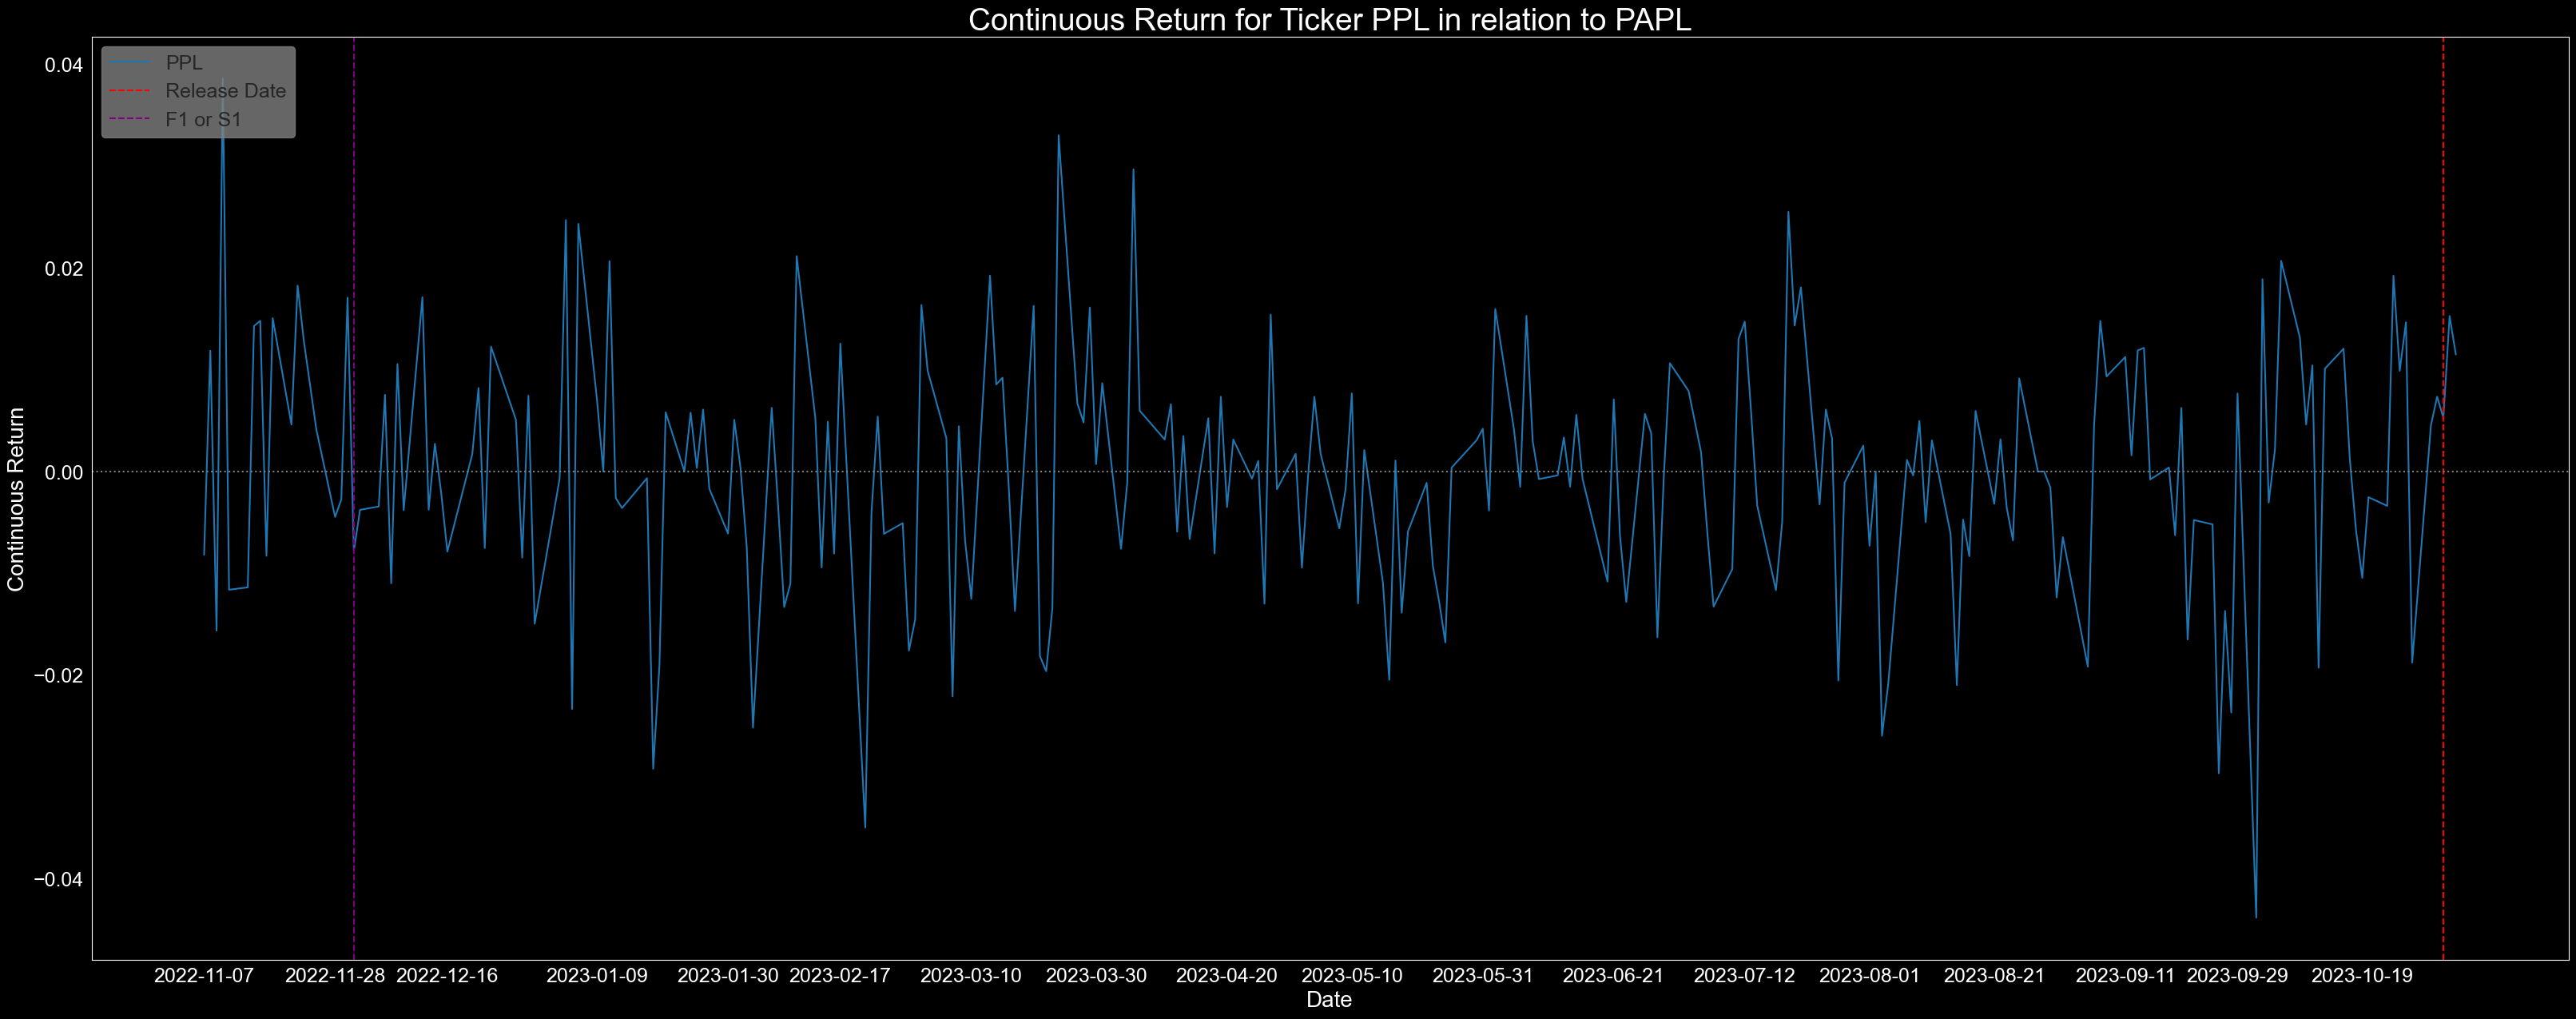

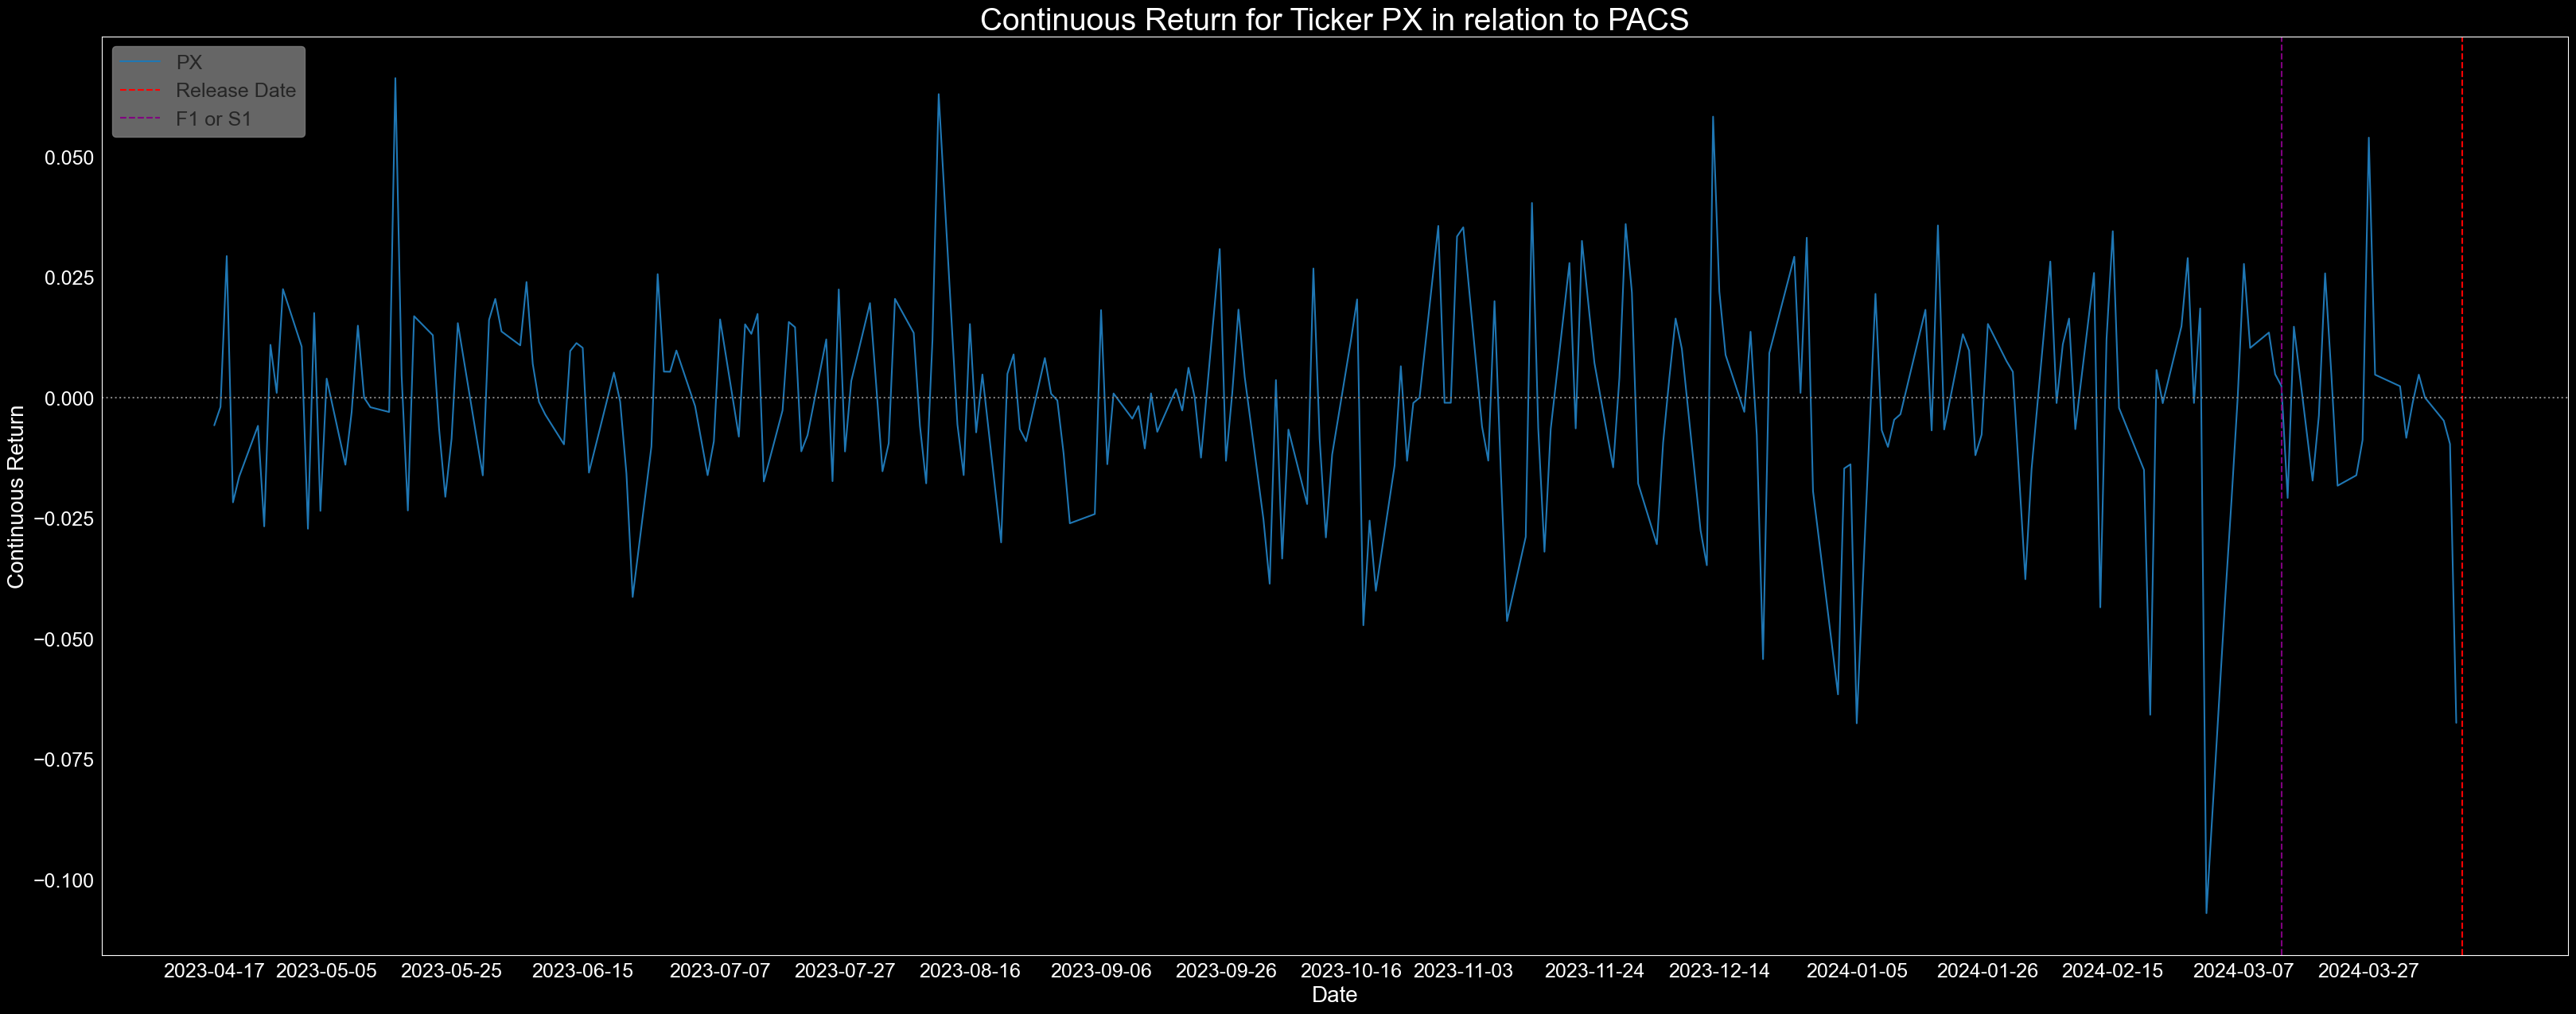

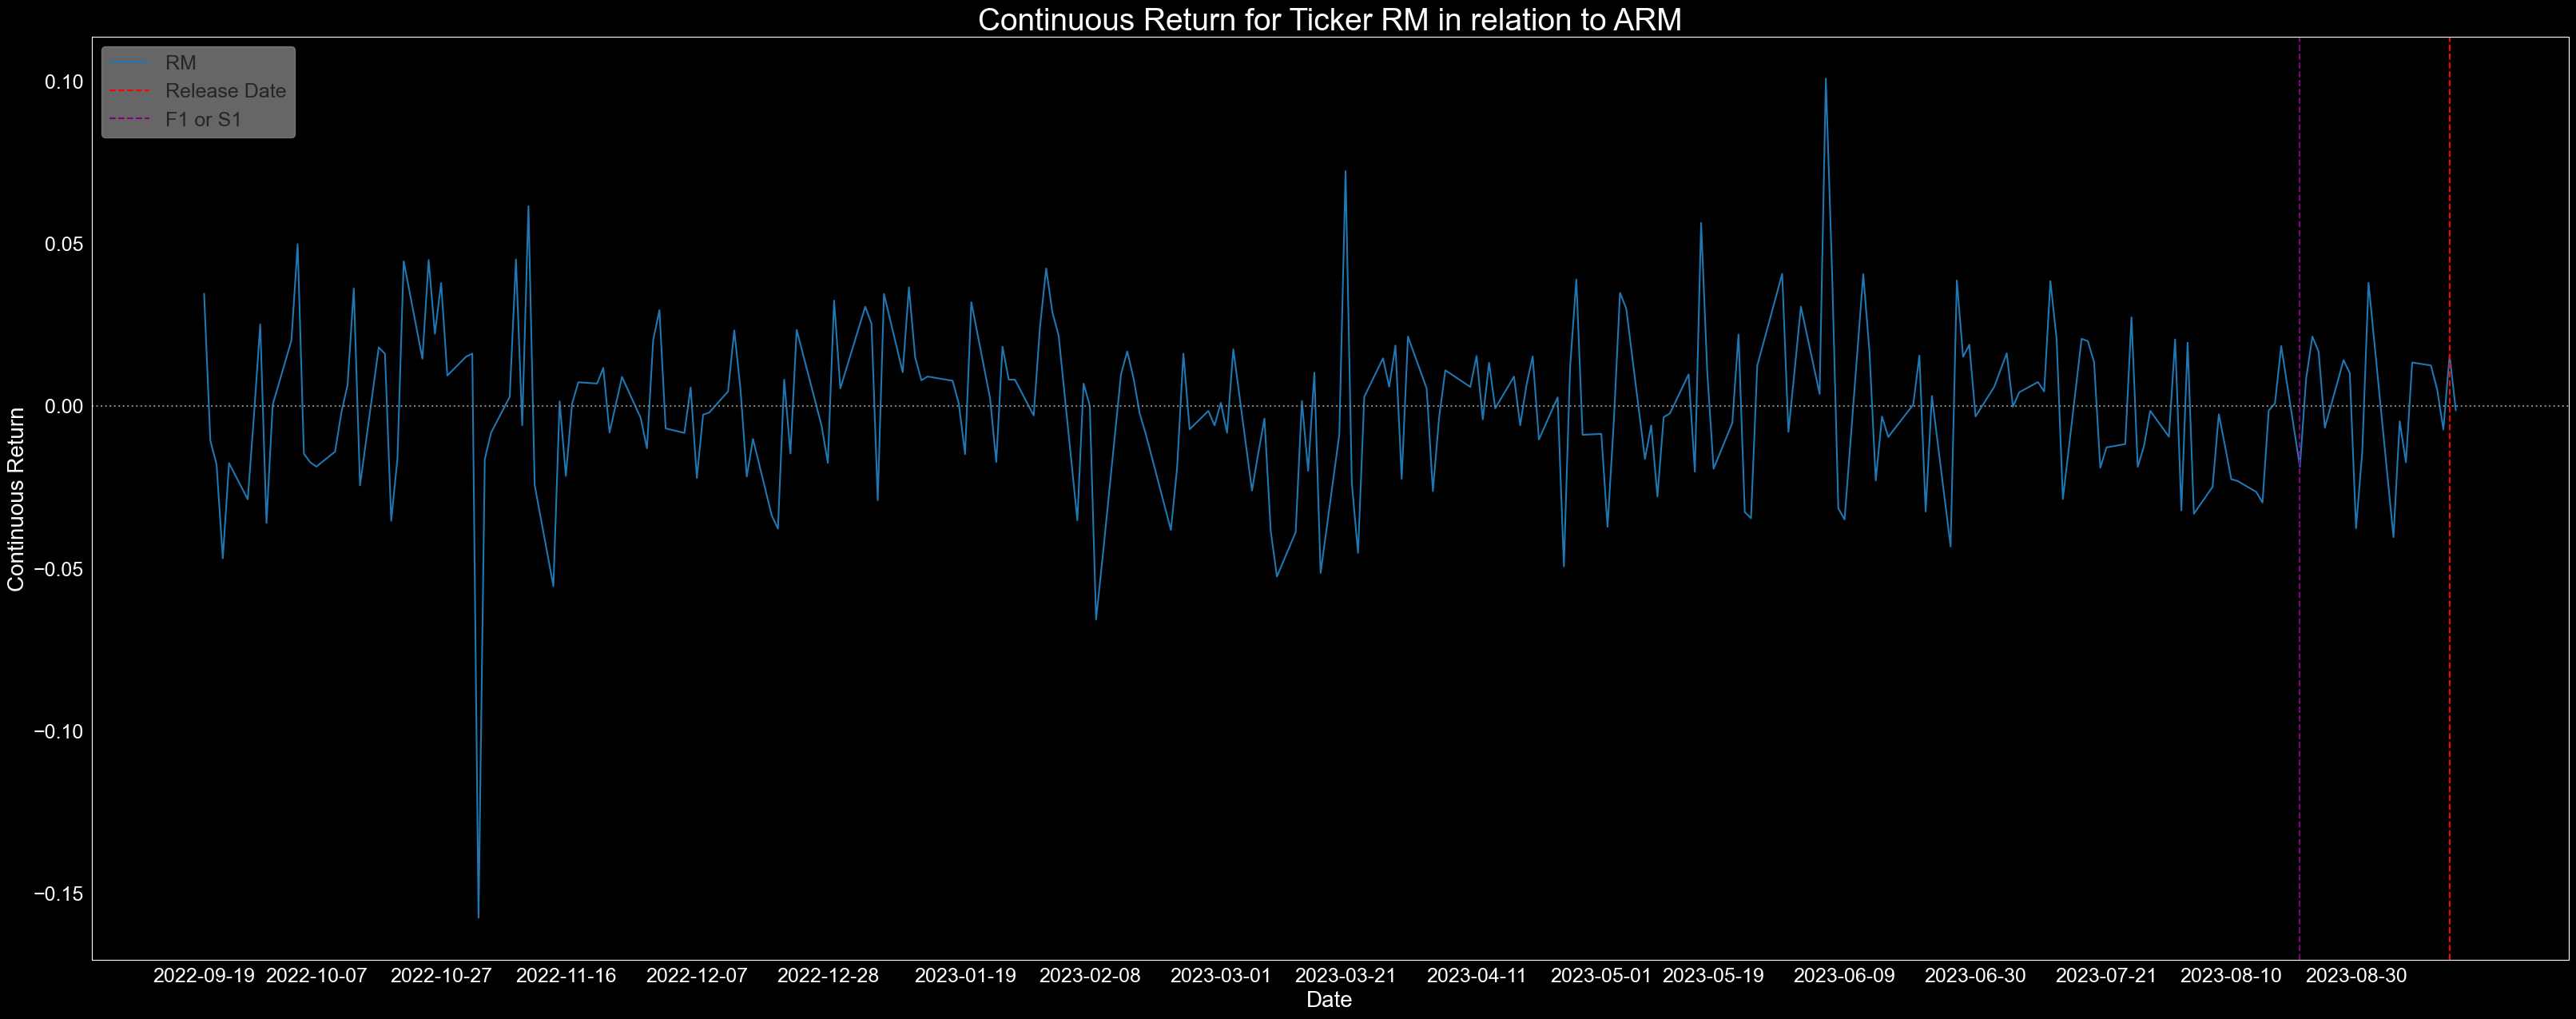

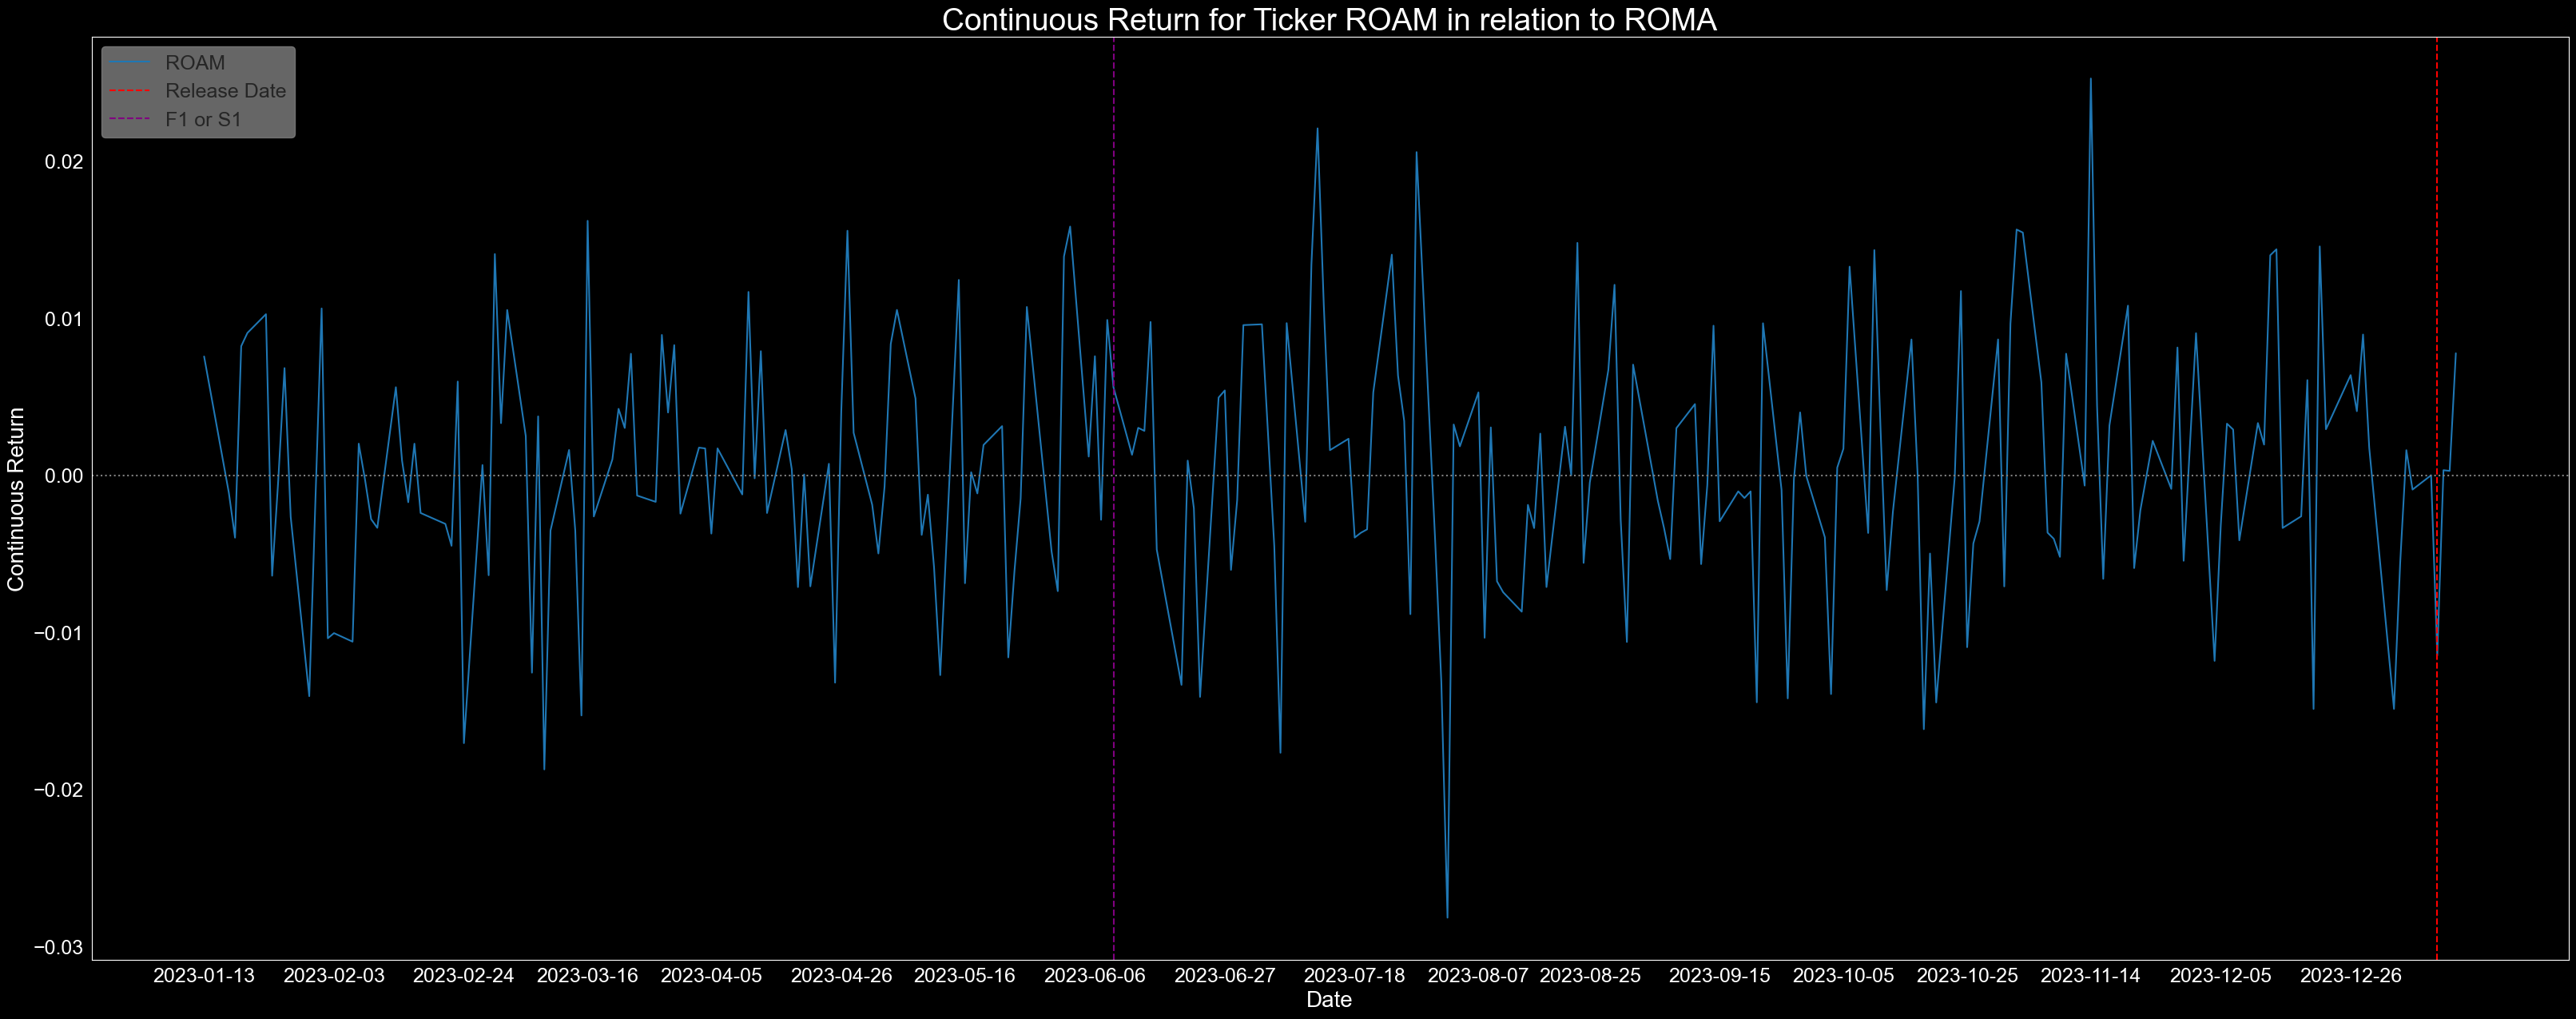

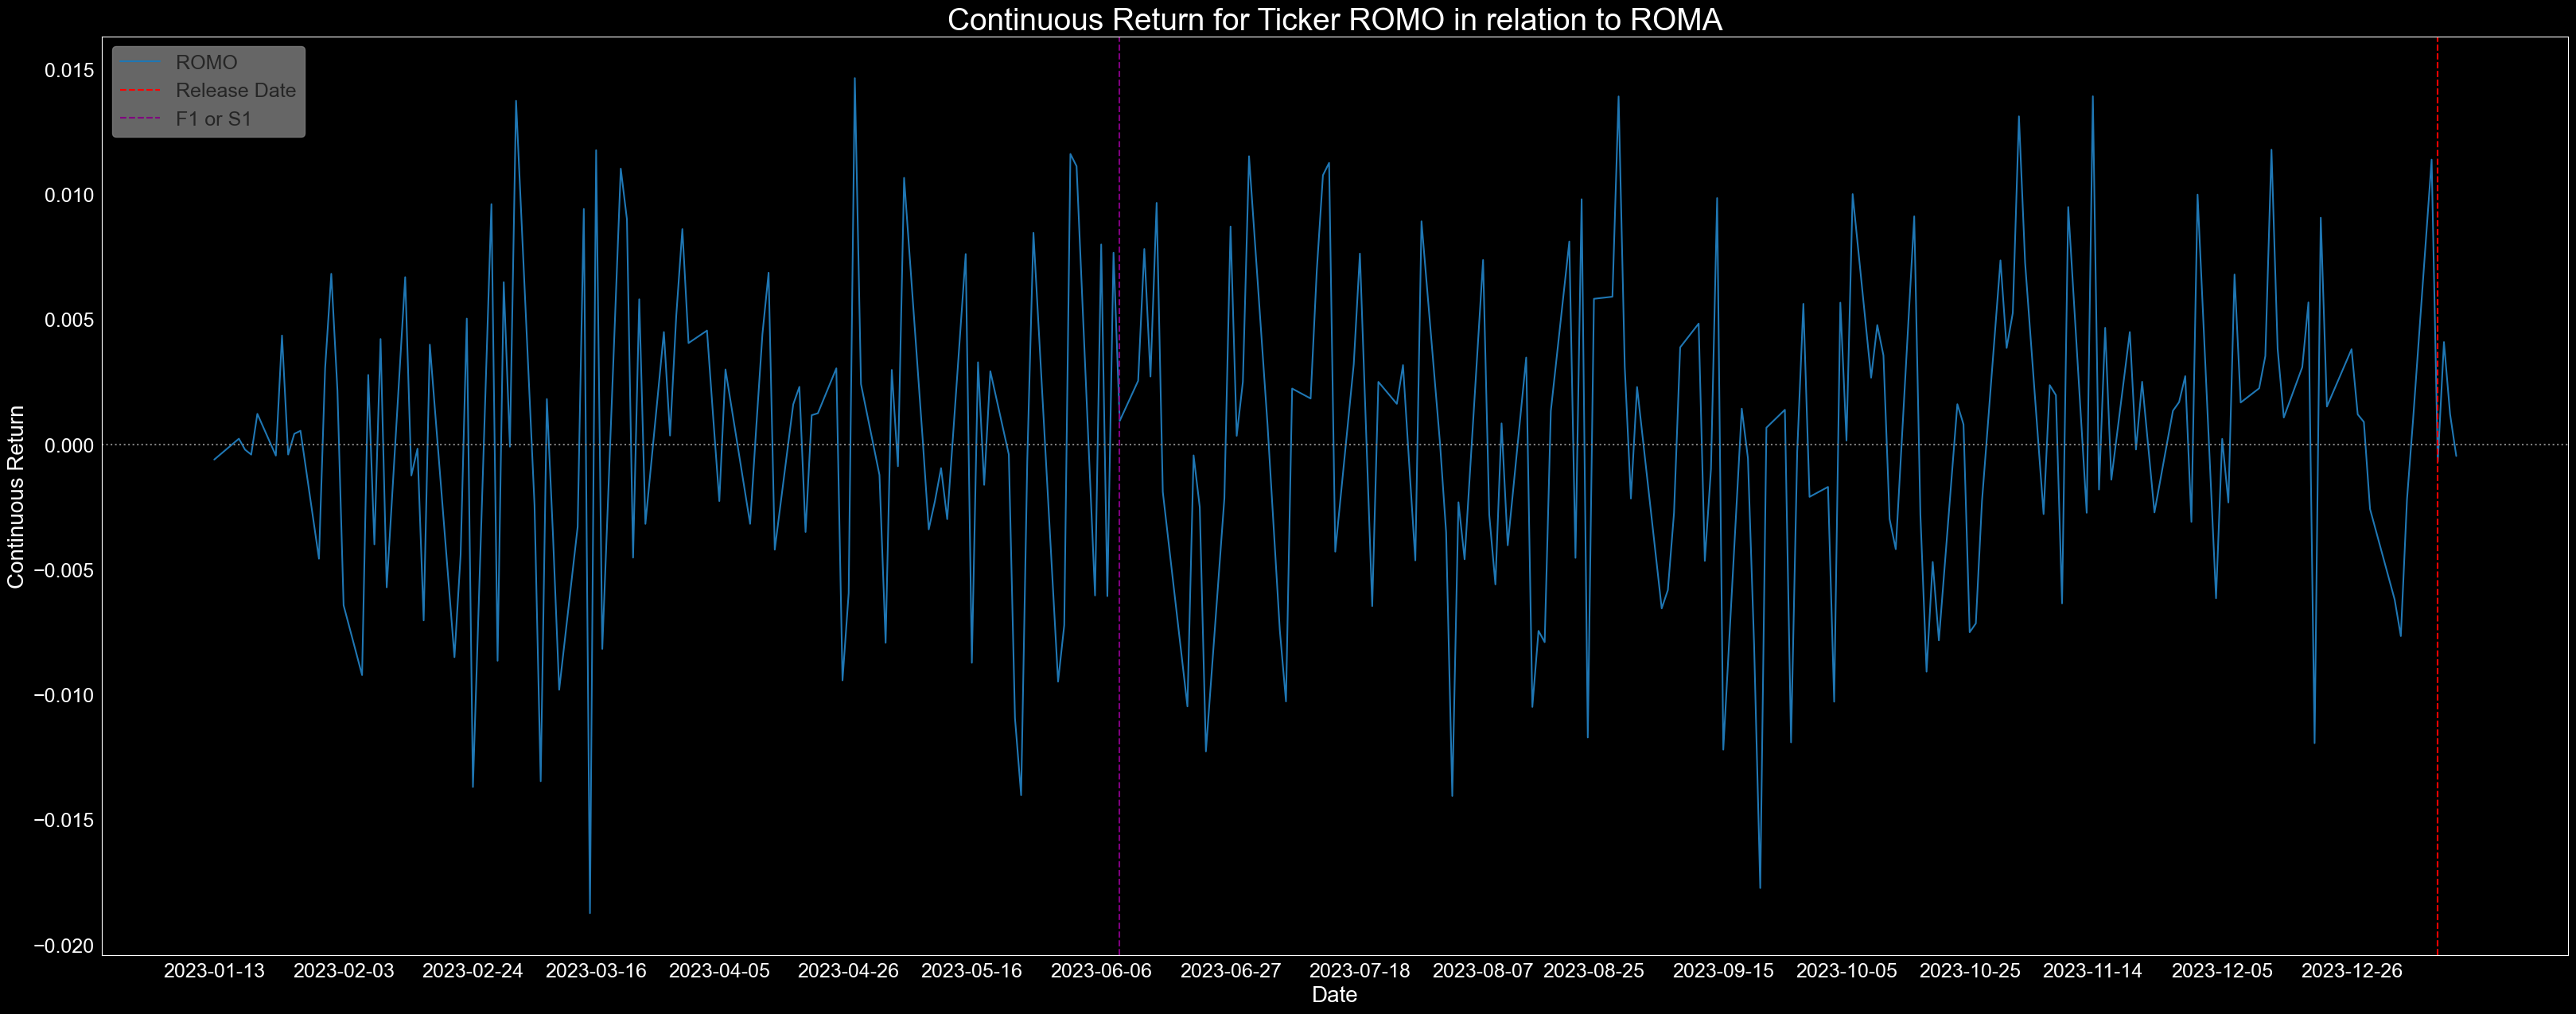

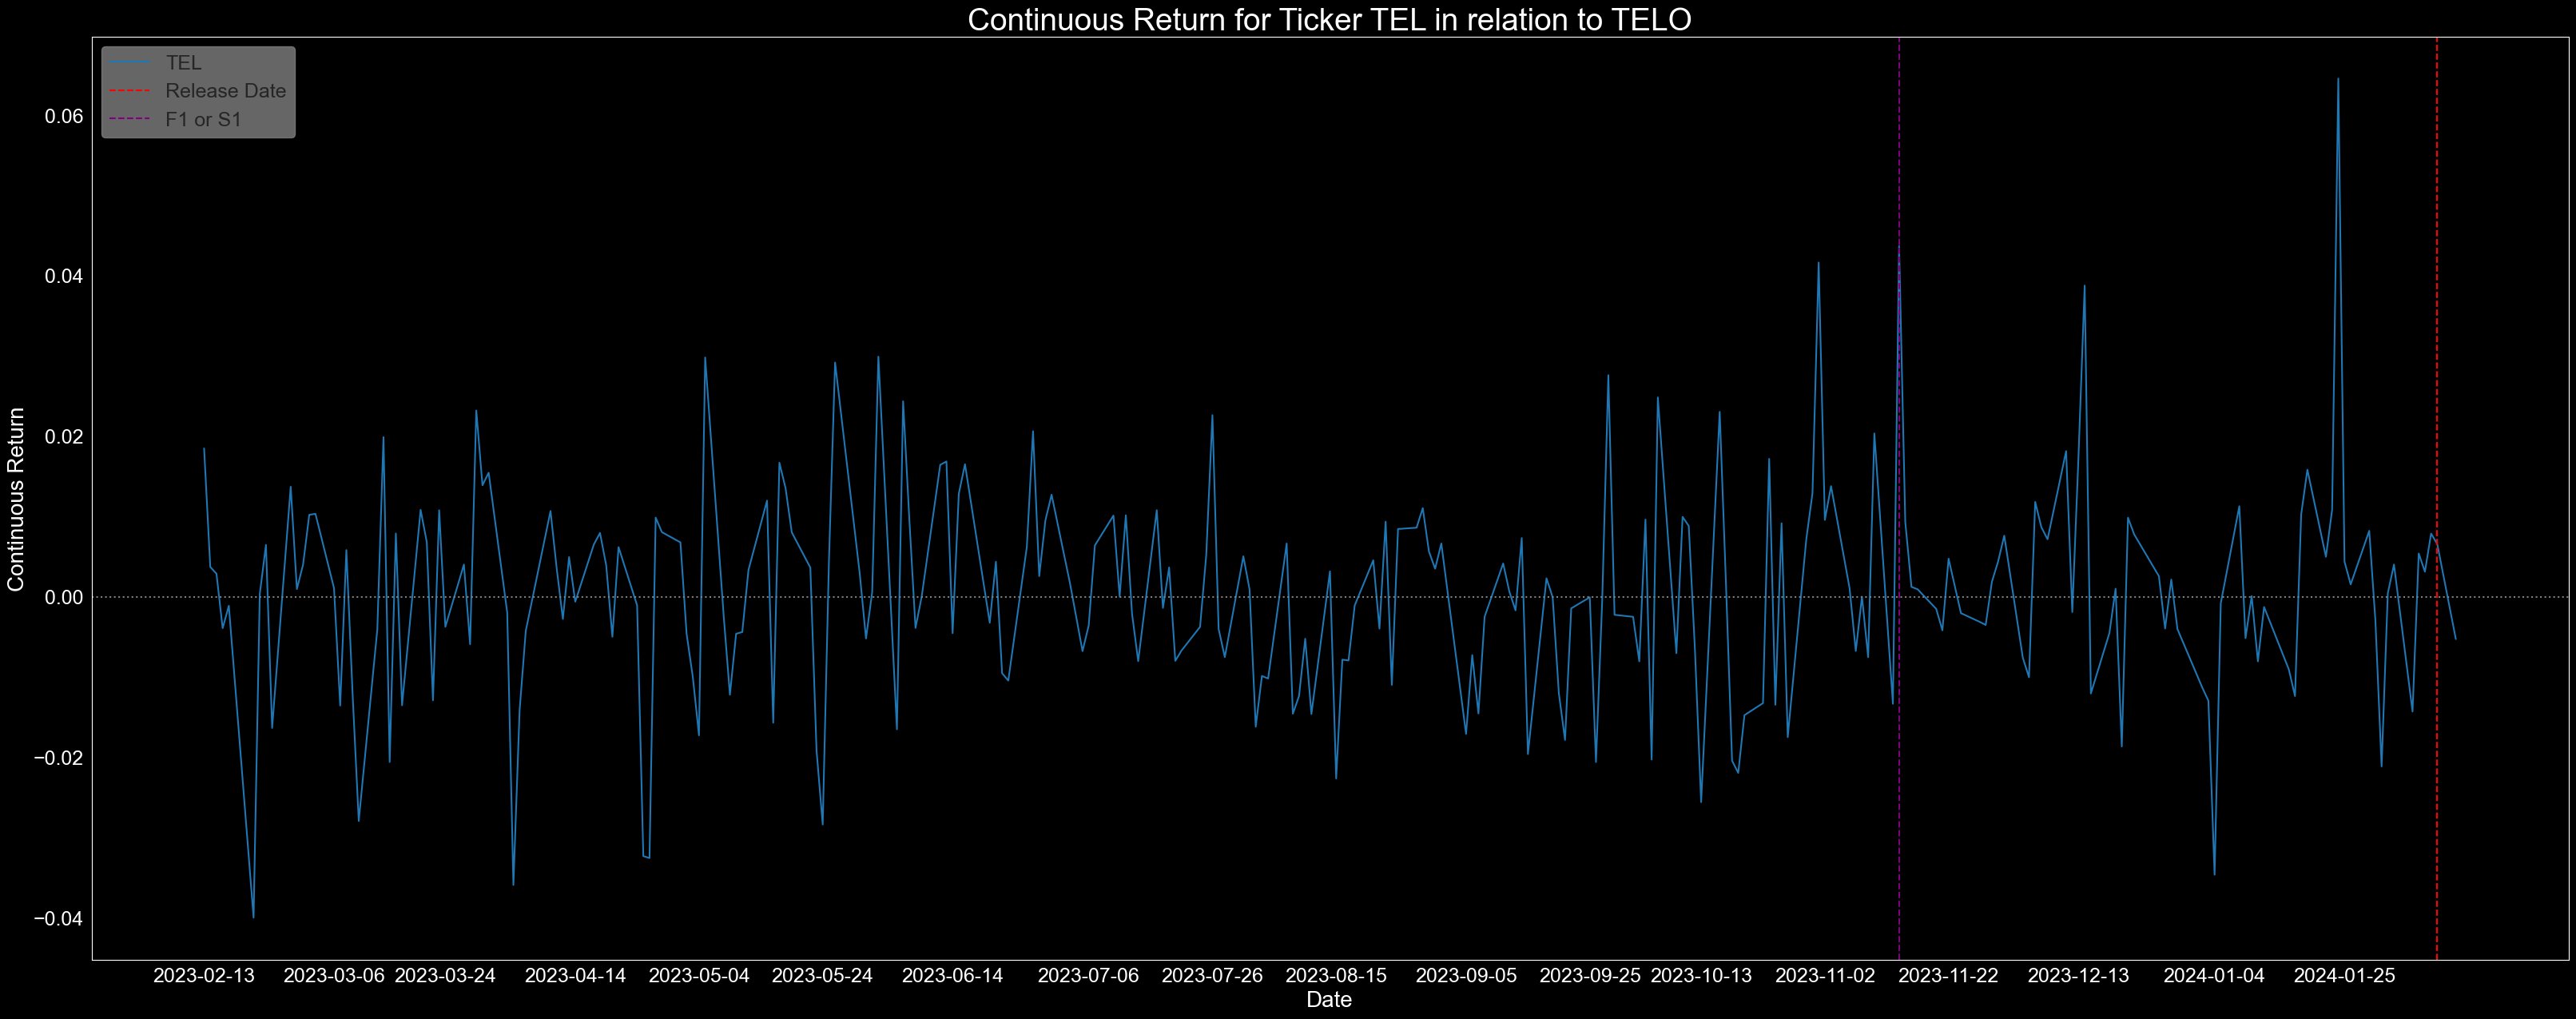

In [8]:
# Plot the continuous return for each ticker
for ticker, data in ticker_data_dict.items():

    # Get the release date for the current ticker
    release_date = ipo_list_matched.loc[ipo_list_matched['Dependent'] == ticker, 'IPO_date'].iloc[0]
    other_news = ipo_list_matched.loc[ipo_list_matched['Dependent'] == ticker, 'Pre_date'].iloc[0]
    # Get the 'Independent' value for the current ticker
    independent_value = ipo_list_matched.loc[ipo_list_matched['Dependent'] == ticker, 'Independent'].iloc[0]
    
    # Plot the continuous return data
    plt.figure(figsize=(40, 15),facecolor='black')
    plt.plot(data.index, data[ticker], label=ticker)
    
    # Mark the release date on the plot
    plt.axvline(x=release_date, color='red', linestyle='--', label='Release Date')
    plt.axvline(x=other_news, color='purple', linestyle='--', label='F1 or S1')
    
    plt.axhline(y=0, color='0.5', linestyle=':')
    
    plt.title(f'Continuous Return for Ticker {ticker} in relation to {independent_value}', fontsize=28, color='white')  # Set title font size
    plt.xlabel('Date', fontsize=20, color='white')  # Set x-axis label font size
    plt.ylabel('Continuous Return', fontsize=20, color='white')  # Set y-axis label font size
    plt.xticks(fontsize=18, color='white')  # Set x-axis tick label font size
    plt.yticks(fontsize=18, color='white')  # Set y-axis tick label font size
    plt.legend(fontsize=18, facecolor='gray', edgecolor='gray', loc='upper left' )  # Set legend font size, background color, and edge color
    plt.grid(False)  # Set grid color
    plt.gca().set_facecolor('black')  # Set plot background color
    plt.gca().set_xticks(data.index[::14])
    plt.show()


## With the visualizations created, we can see that there are some interesting and sudden spikes or drops related to F1/S1 filings and IPO's.

## However, quick research can show that these spikes are unrelated and exclusive to the dependent variables own operations, for the most part.

# For research purposes, I believe it is worthwhile to create portfolios and simulations on these tickers to draw a positive Rate of Return

In [9]:
import scipy.optimize as sco
b_min = 0; b_max = 1 # weights for bounds in optimization
risk_free = .0047
num_simulations = 5000
np.random.seed(18)

### Pull Expected value, volatility and covariance

In [10]:
return_means = specified_returns.mean()
return_stds = specified_returns.std()
return_cov = specified_returns.cov()
print(return_means)
print(return_stds)
print(return_cov)
nStocks = len(specified_returns.columns)

AAPL     0.000634
BARK    -0.001175
BOWL    -0.000532
BRK-A    0.000602
BRK-B    0.000601
LOB      0.001250
PAC     -0.000274
PACK     0.001233
PAG      0.000181
PAGS     0.000854
PAXS     0.000469
PPL     -0.000068
PX      -0.000739
RM      -0.000170
ROAM     0.000297
ROMO     0.000185
TEL      0.000299
dtype: float64
AAPL     0.012318
BARK     0.035238
BOWL     0.027010
BRK-A    0.008572
BRK-B    0.008244
LOB      0.024033
PAC      0.023425
PACK     0.042685
PAG      0.014445
PAGS     0.022996
PAXS     0.007326
PPL      0.009476
PX       0.017473
RM       0.020789
ROAM     0.006453
ROMO     0.005104
TEL      0.010840
dtype: float64
           AAPL      BARK          BOWL         BRK-A     BRK-B       LOB  \
AAPL   0.000152  0.000084  4.237096e-06  4.726513e-05  0.000049  0.000027   
BARK   0.000084  0.001242  1.633823e-05  4.782387e-05  0.000050  0.000089   
BOWL   0.000004  0.000016  7.295199e-04  5.614367e-07  0.000007  0.000116   
BRK-A  0.000047  0.000048  5.614367e-07  7.348234e

### Plot volatility

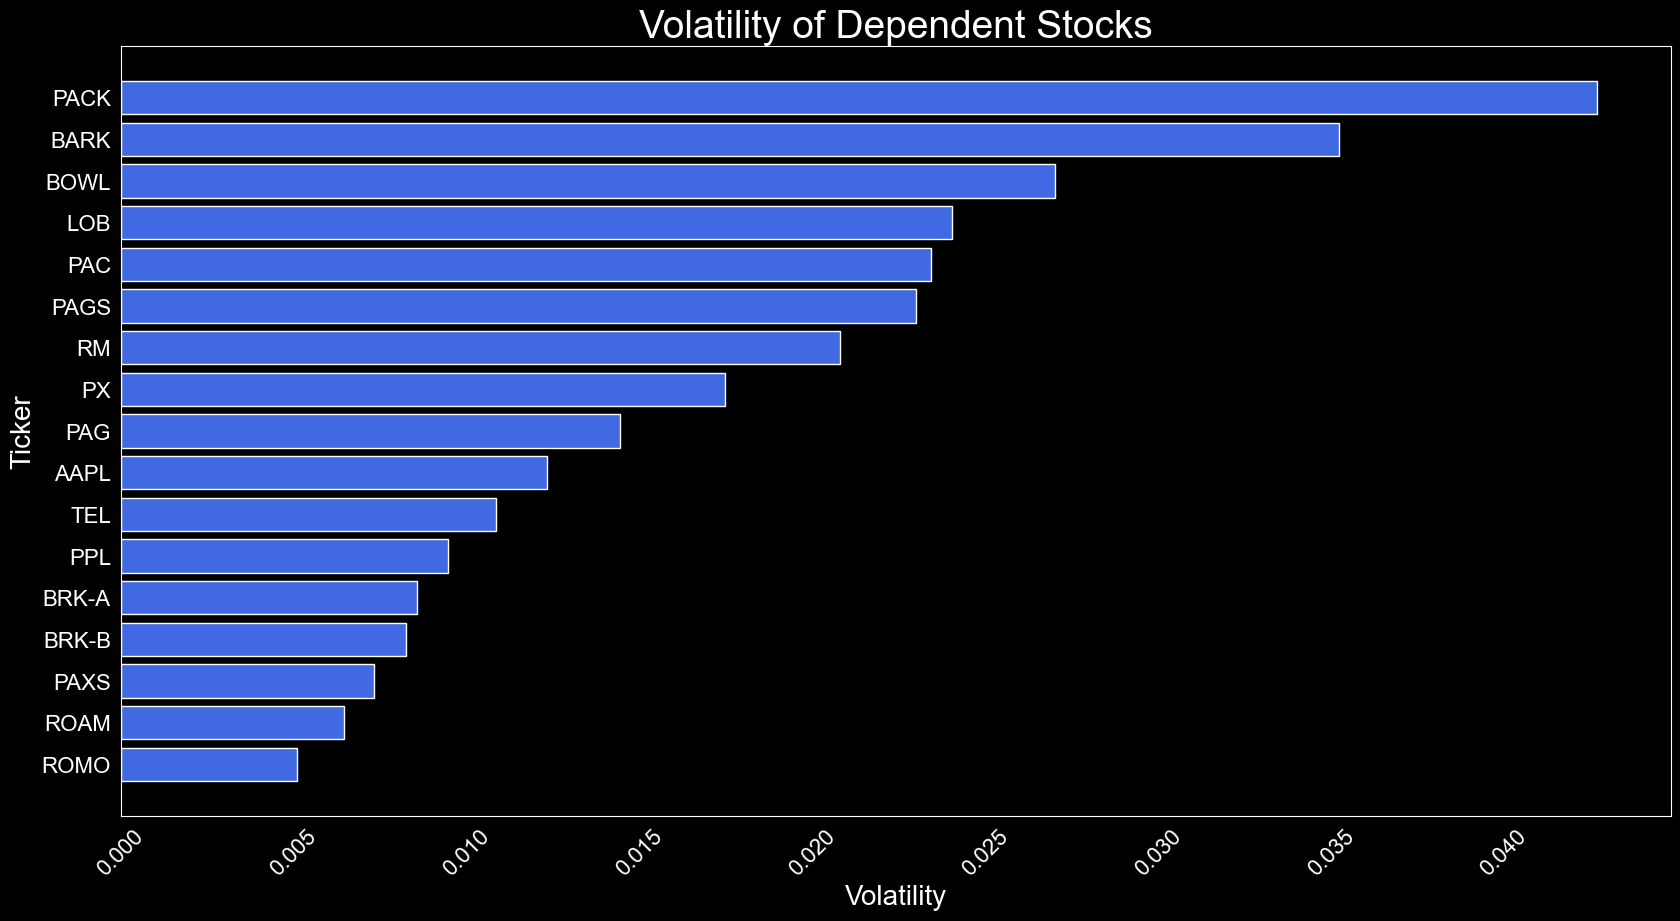

In [11]:
return_stds.sort_values(ascending=True,inplace=True)
plt.figure(figsize=(20, 10), facecolor='black')
plt.barh(return_stds.index, return_stds.values, color='royalblue')

plt.title('Volatility of Dependent Stocks', fontsize=28, color='white')
plt.xlabel('Volatility', fontsize=20, color='white')
plt.ylabel('Ticker', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=45)
plt.yticks(fontsize=16, color='white')

plt.grid(False)
plt.gca().set_facecolor('black')
plt.show()

## Create simulations for portofio construction using the specified time ranges
* Code referenced from Robert Dubil's Fin6500 portfolio optimization lesson

In [12]:
all_weights = np.ones((num_simulations, nStocks))
mn_arr = np.zeros(num_simulations)
vol_arr = np.zeros(num_simulations)

for x in range(num_simulations):
    weights = np.random.uniform(0, 1, nStocks)    
    weights = weights / np.sum(weights)
    all_weights[x, :] = weights 
    mn_arr[x] = np.sum((return_means * weights))
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(return_cov, weights)))

print(np.c_[mn_arr, vol_arr])

[[0.00022028 0.00982189]
 [0.00023571 0.00822916]
 [0.00023582 0.01022771]
 ...
 [0.00024729 0.00876724]
 [0.00024813 0.00761298]
 [0.00030169 0.00833249]]


In [13]:
def get_sharpe(weights):
    weights = np.array(weights)
    mean = np.sum(return_means * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(return_cov, weights)))
    sharpe = (mean-risk_free)/ vol
    return sharpe

def comp_neg_mean(weights):
    return -(np.sum(return_means * weights))

def comp_pos_mean(weights):
    return np.sum(return_means * weights)

def comp_std(weights):
    return np.sqrt(np.dot(weights.T, np.dot(return_cov, weights)))

def comp_pos_sharpe(weights):
    return get_sharpe(weights)

def comp_neg_sharpe(weights):
    return -get_sharpe(weights)

def check_sum(weights):
    return np.sum(weights) - 1
    

In [14]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

bounds = tuple((0, 1) for stock in range(nStocks))
initialGuess = np.repeat(1. / nStocks, nStocks)
optResults = sco.minimize(comp_std, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)

min_var_weights = optResults.x
min_var_mean = comp_pos_mean(min_var_weights)
min_var_std = comp_std(min_var_weights)

print("Constraints:")
print(constraints)

print("Bounds:")
print(bounds)

print("Initial Guess Values:")
print(initialGuess)

print("MinVar Minimization Stats")
print("-"*40)
print(f"Expected Return: {round(min_var_mean*100, 4)}%")
print(f"Volatility: {round(min_var_std*100, 4)}%")

Constraints:
{'type': 'eq', 'fun': <function <lambda> at 0x000002210B8F7550>}
Bounds:
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
Initial Guess Values:
[0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353]
MinVar Minimization Stats
----------------------------------------
Expected Return: 0.0303%
Volatility: 0.4404%


In [15]:
constraints = ({'type': 'eq', 'fun': check_sum})
optResults = sco.minimize(comp_neg_sharpe, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)

sharpe_weights = optResults.x
sharpe_mean = comp_pos_mean(sharpe_weights)
sharpe_std = comp_std(sharpe_weights)
sharpe_sharpe = comp_pos_sharpe(sharpe_weights)
print("Sharpe Ratio Maximization Stats")
print("-"*40)
print(f"Expected Return: {round(sharpe_mean*100, 4)}%")
print(f"Volatility: {round(sharpe_std*100, 4)}%")
print(f"Sharpe Ratio: {round(sharpe_sharpe, 4)}")

Sharpe Ratio Maximization Stats
----------------------------------------
Expected Return: 0.1233%
Volatility: 4.2685%
Sharpe Ratio: -0.0812


In [16]:
frontier_min = min_var_std
frontier_bottom_max = sharpe_std
frontier_top_max = sharpe_std * 1.6

frontier_x_top = np.linspace(frontier_min, frontier_top_max)
frontier_x_bottom = np.linspace(frontier_min, frontier_bottom_max)

# Top mean
frontier_y_top = []
for possible_vol in frontier_x_top:
    constraints = ({'type': 'eq', 'fun': check_sum}, 
                   {'type': 'eq', 'fun': lambda w: comp_std(w) - possible_vol})
                   # Vol of portfolio - possible vol should equal zero
    optResult = sco.minimize(comp_neg_mean, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)
    frontier_y_top.append(-optResult['fun'])

# Bottom mean
frontier_y_bottom = []
for possible_vol in frontier_x_bottom:
    constraints = ({'type': 'eq', 'fun': check_sum},
                   {'type': 'eq', 'fun': lambda w: comp_std(w) - possible_vol})
                   # Vol of portfolio - possible vol should equal zero
    optResult = sco.minimize(comp_pos_mean, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)
    frontier_y_bottom.append(optResult['fun'])

In [17]:
weightsSharpe = np.linspace(0, 1, 70)
cml_y = []
cml_x = []
for weightSharpe in weightsSharpe:
    cml_x.append(weightSharpe*sharpe_std)
    cml_y.append(weightSharpe*sharpe_mean+(1-weightSharpe)*risk_free)

print('CML')
print(np.c_[weightsSharpe, cml_y, cml_x])

CML
[[0.00000000e+00 4.70000000e-03 0.00000000e+00]
 [1.44927536e-02 4.64975293e-03 6.18625516e-04]
 [2.89855072e-02 4.59950585e-03 1.23725103e-03]
 [4.34782609e-02 4.54925878e-03 1.85587655e-03]
 [5.79710145e-02 4.49901171e-03 2.47450206e-03]
 [7.24637681e-02 4.44876464e-03 3.09312758e-03]
 [8.69565217e-02 4.39851756e-03 3.71175309e-03]
 [1.01449275e-01 4.34827049e-03 4.33037861e-03]
 [1.15942029e-01 4.29802342e-03 4.94900413e-03]
 [1.30434783e-01 4.24777635e-03 5.56762964e-03]
 [1.44927536e-01 4.19752927e-03 6.18625516e-03]
 [1.59420290e-01 4.14728220e-03 6.80488067e-03]
 [1.73913043e-01 4.09703513e-03 7.42350619e-03]
 [1.88405797e-01 4.04678805e-03 8.04213170e-03]
 [2.02898551e-01 3.99654098e-03 8.66075722e-03]
 [2.17391304e-01 3.94629391e-03 9.27938273e-03]
 [2.31884058e-01 3.89604684e-03 9.89800825e-03]
 [2.46376812e-01 3.84579976e-03 1.05166338e-02]
 [2.60869565e-01 3.79555269e-03 1.11352593e-02]
 [2.75362319e-01 3.74530562e-03 1.17538848e-02]
 [2.89855072e-01 3.69505854e-03 1.23

## Plot CML and Efficient Frontier

C:\Users\kyle.anderson\AppData\Local\Temp\ipykernel_29348\1430231447.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(return_stds, return_means, cmap='plasma')
C:\Users\kyle.anderson\AppData\Local\Temp\ipykernel_29348\1430231447.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (return_stds[i], return_means[i]))


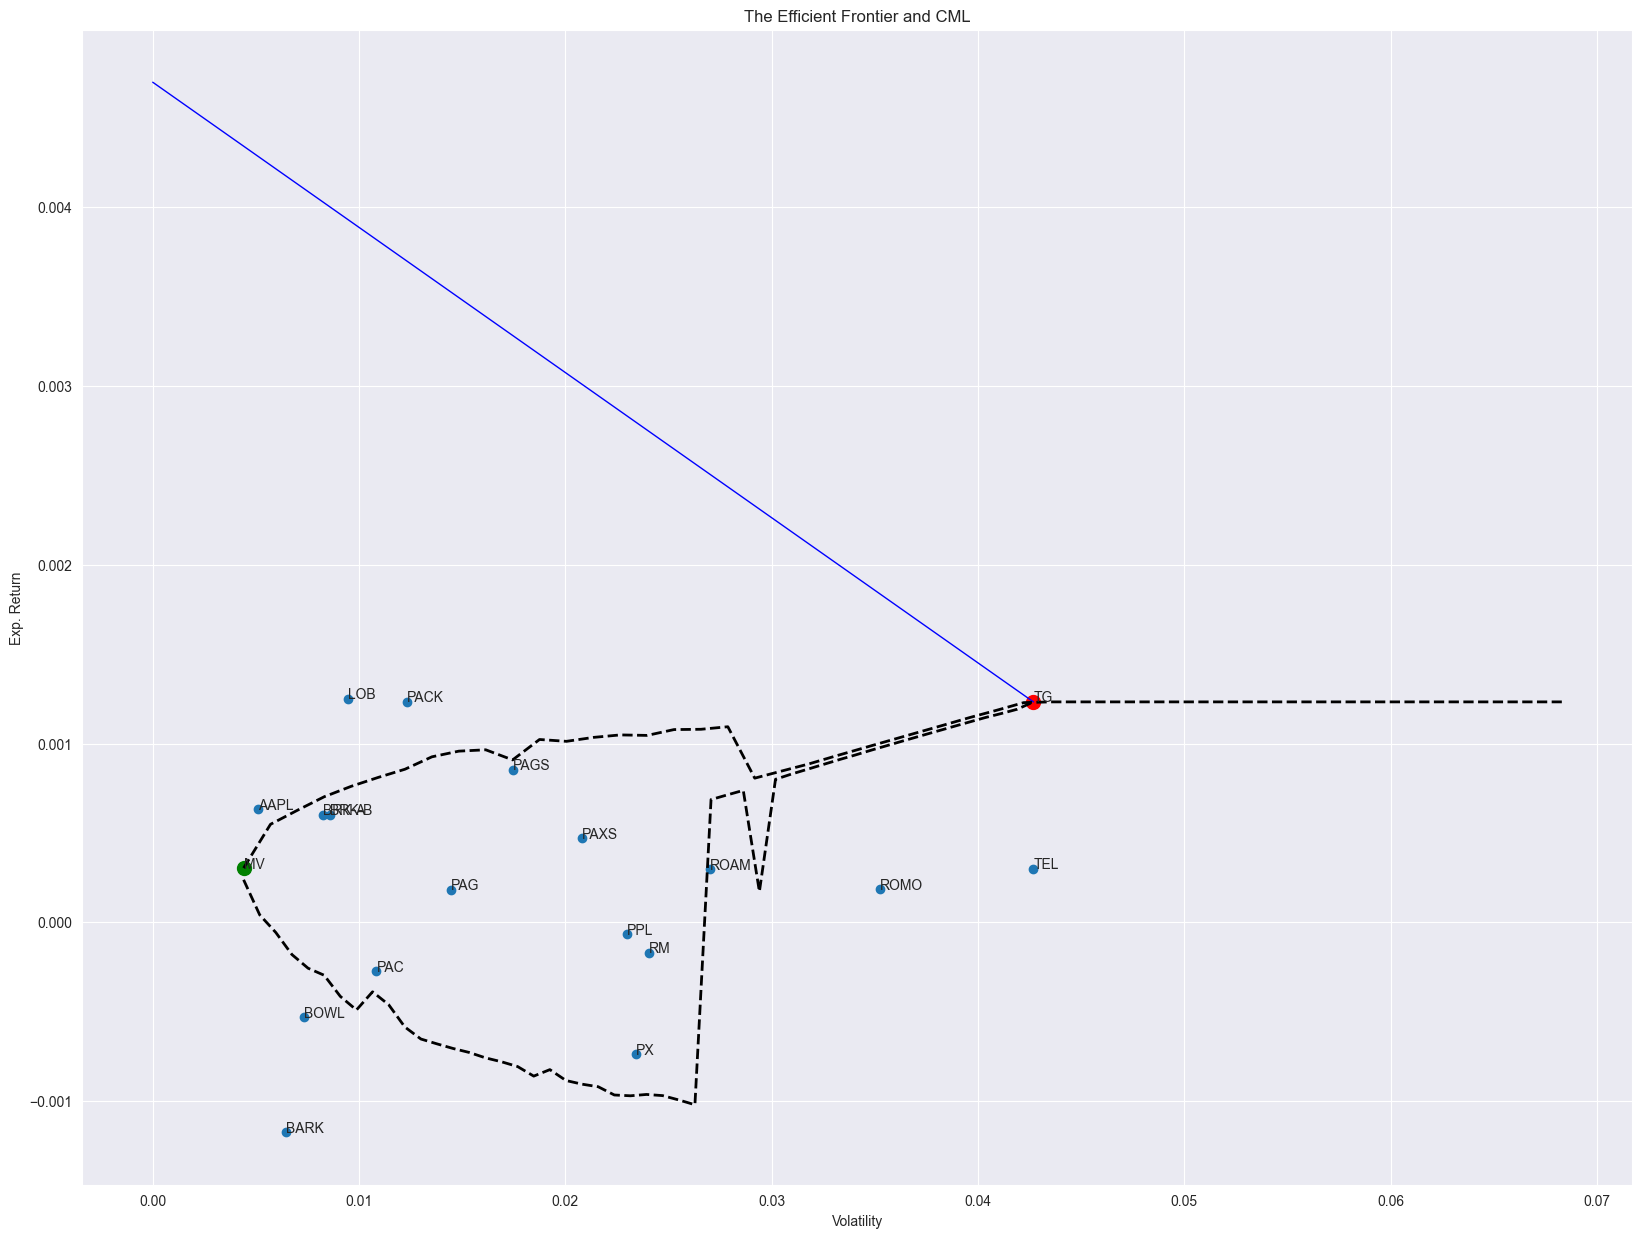

In [18]:
plt.figure(figsize=(20,15))

plt.title('The Efficient Frontier and CML')
plt.xlabel('Volatility')
plt.ylabel('Exp. Return')
plt.scatter(sharpe_std, sharpe_mean, c='red', s=100) 
plt.annotate("TG", (sharpe_std, sharpe_mean))
plt.scatter(min_var_std, min_var_mean, c='green', s=100) 
plt.annotate("MV", (min_var_std, min_var_mean))
plt.scatter(return_stds, return_means, cmap='plasma')

labels=(list(specified_returns.columns))
for i, txt in enumerate(labels):
    plt.annotate(txt, (return_stds[i], return_means[i]))
plt.plot(cml_x,cml_y, 'b-', linewidth=1)
plt.plot(frontier_x_top,frontier_y_top, 'k--', linewidth=2)
plt.plot(frontier_x_bottom,frontier_y_bottom, 'k--', linewidth=2)
plt.show()

# Conclusion

## From the data that I gathered, there is no indication that there was a significant impact on the market due to mispelling a ticker.

## Based on the date ranges provided this is the portfolio that was generated. The returns are understandably small due to a lack of data as the porfolios is based on a range between 22 and 374 days. This is the best portfolio possible.

### While it is a poor performing portfolio, it does show that building a portfolio based on extreme outliers for a peculiar spelling, is not ideal.
### I believe it is worthwhile to focus on the independent variables and the stocks they could impact as other studies have confirmed that there are surprising correlations with a smaller subset of stocks that are all spelled in a similar pattern.

In [19]:
print("Max date range: ", date_range_max," Min date range: ", date_range_min)

Max date range:  374  Min date range:  22
